In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as sn
import sklearn.metrics as sm

In [2]:
data = pd.read_csv("C:/Users/Sathya/Desktop/Data science assignments/27 November/KNN Assignment/bangalore house price prediction OHE-data.csv")
data

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.00,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.00,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.00,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.00,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.00,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = data.copy()

In [4]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [5]:
df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [7]:
df.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,...,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,...,0.003090,0.003090,0.002949,0.002949,0.002949,0.002949,0.002809,0.002809,0.002809,0.002809
std,0.876822,0.770583,116.185034,913.779769,0.841520,2556.650935,0.432637,0.386121,0.241060,0.405403,...,0.055505,0.055505,0.054232,0.054232,0.054232,0.054232,0.052929,0.052929,0.052929,0.052929
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.230000,1100.000000,2.000000,4416.761042,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,69.000000,1255.000000,2.000000,5417.855613,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,104.000000,1640.250000,3.000000,6618.285651,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,3.000000,2912.000000,30400.000000,9.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.corrwith(df.bath,axis=0)

bath                           1.000000
balcony                        0.283192
price                          0.523941
total_sqft_int                 0.653435
bhk                            0.882461
                                 ...   
location_Hosur Road            0.011201
location_Horamavu Banaswadi   -0.020635
location_Domlur                0.006606
location_Mahadevpura          -0.017608
location_Tumkur Road          -0.002474
Length: 108, dtype: float64

In [9]:
df.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
bath,1.000000,0.283192,0.523941,0.653435,0.882461,0.350497,-0.118940,0.030143,0.161243,0.022495,...,-0.010388,-0.019047,-0.015385,0.002339,0.049603,0.011201,-0.020635,0.006606,-0.017608,-0.002474
balcony,0.283192,1.000000,0.138946,0.200648,0.269511,0.068018,0.120220,-0.048382,-0.138809,0.117337,...,0.027585,-0.015110,-0.018297,0.022038,0.024569,-0.020262,0.022541,0.000445,0.008764,-0.018788
price,0.523941,0.138946,1.000000,0.797955,0.497817,0.717821,-0.114594,-0.014613,0.229543,0.012542,...,-0.015052,-0.023919,-0.017011,0.019606,0.045599,0.000618,-0.021200,0.019573,-0.015800,-0.006216
total_sqft_int,0.653435,0.200648,0.797955,1.000000,0.647485,0.376673,-0.133719,0.014041,0.219383,0.009710,...,-0.012294,-0.021914,-0.016353,0.003619,0.037007,0.007224,-0.015287,0.007875,-0.011000,-0.010931
bhk,0.882461,0.269511,0.497817,0.647485,1.000000,0.323285,-0.142496,0.044187,0.178557,0.043887,...,-0.009725,-0.021754,-0.011599,-0.002366,0.043803,0.016102,-0.026186,0.005351,-0.010418,0.008504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Hosur Road,0.011201,-0.020262,0.000618,0.007224,0.016102,0.001412,0.001408,0.001151,-0.003231,-0.036076,...,-0.003028,-0.003028,-0.002958,-0.002958,-0.002958,1.000000,-0.002887,-0.002887,-0.002887,-0.002887
location_Horamavu Banaswadi,-0.020635,0.022541,-0.021200,-0.015287,-0.026186,-0.037227,0.024451,-0.018187,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,1.000000,-0.002817,-0.002817,-0.002817
location_Domlur,0.006606,0.000445,0.019573,0.007875,0.005351,0.054259,0.006048,0.002433,-0.013638,0.020595,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,1.000000,-0.002817,-0.002817
location_Mahadevpura,-0.017608,0.008764,-0.015800,-0.011000,-0.010418,-0.023633,0.030585,-0.025060,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,-0.002817,1.000000,-0.002817


<AxesSubplot:>

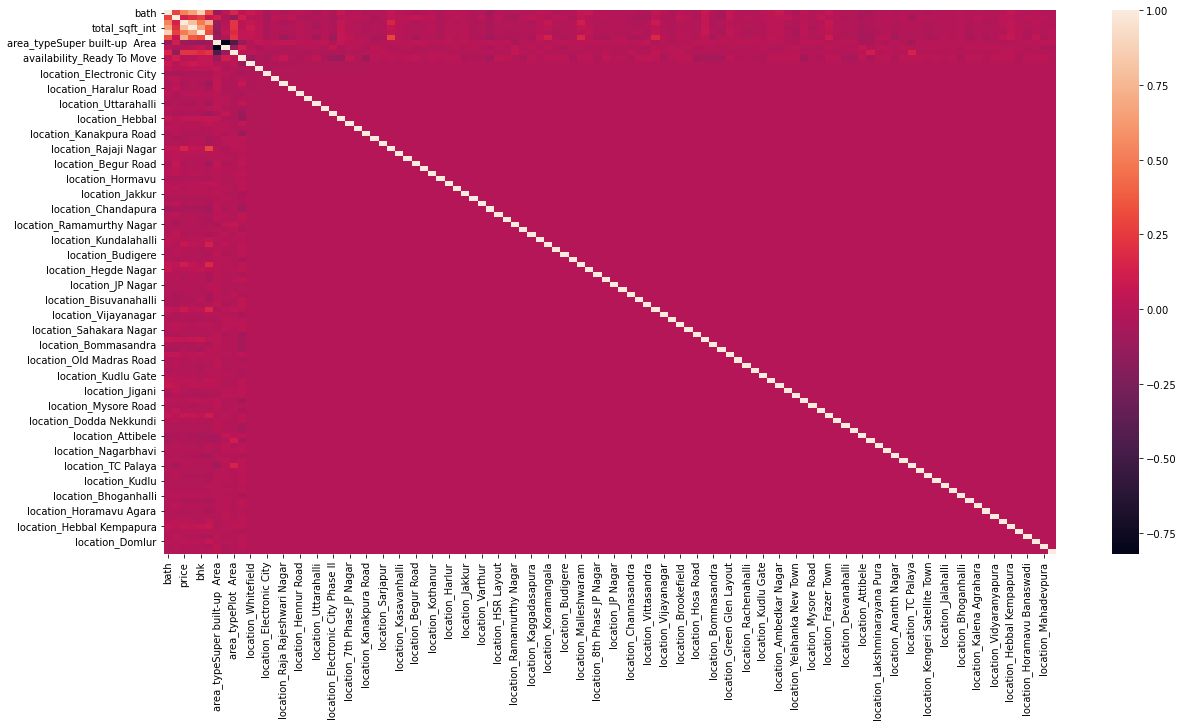

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [11]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

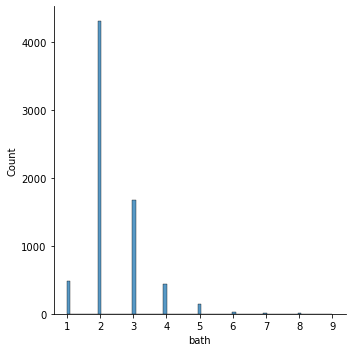

In [12]:
sns.displot(x='bath',data=df)

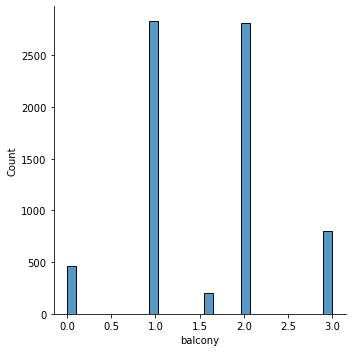

In [13]:
sns.displot(x='balcony',data=df)

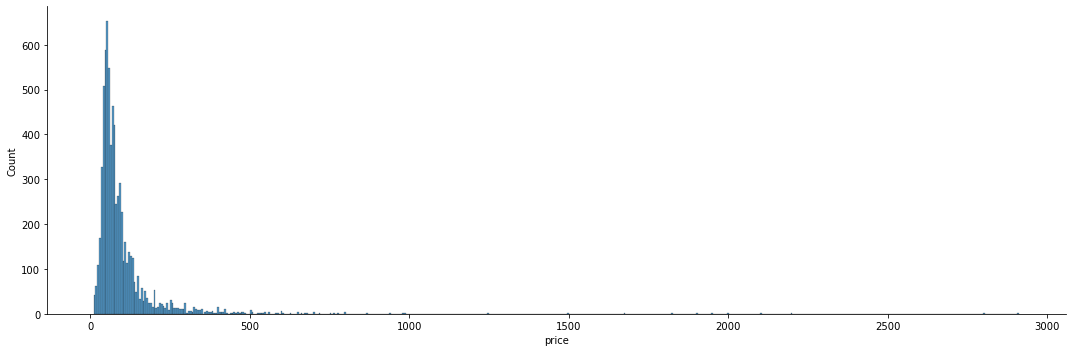

In [14]:
sns.displot(x='price',height=5,aspect=3,data=df)

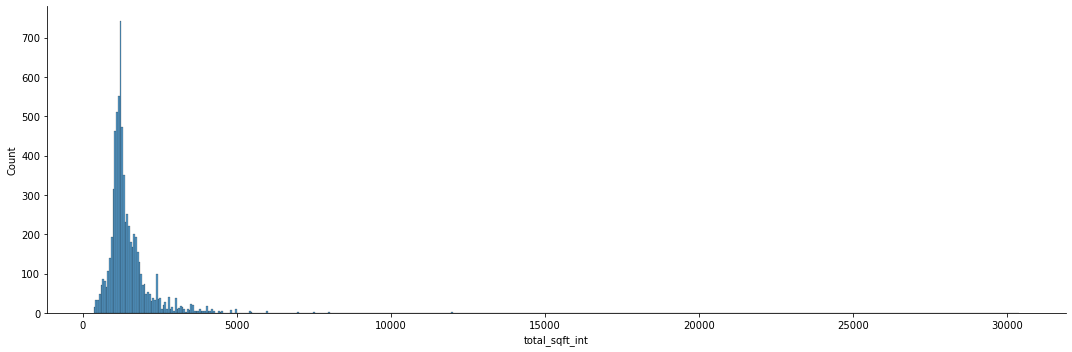

In [15]:
sns.displot(x='total_sqft_int',height=5,aspect=3,data=df)

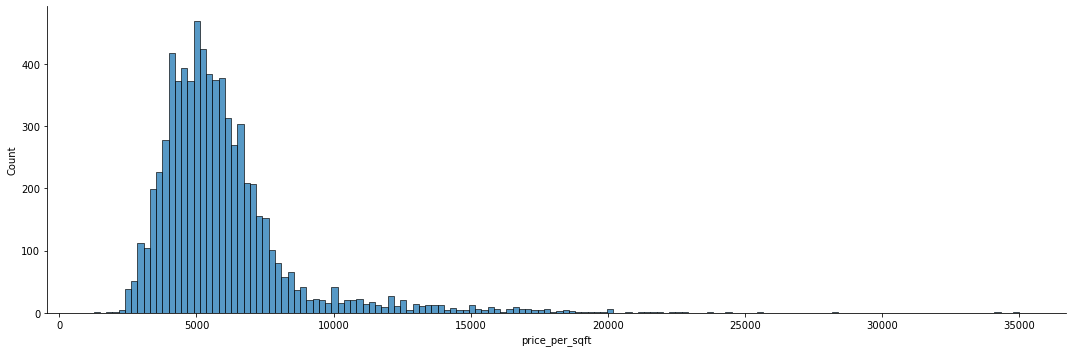

In [16]:
sns.displot(x='price_per_sqft',height=5,aspect=3,data=df)

<AxesSubplot:ylabel='bath'>

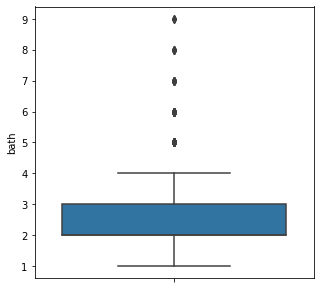

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(y="bath",data=df)

<AxesSubplot:ylabel='balcony'>

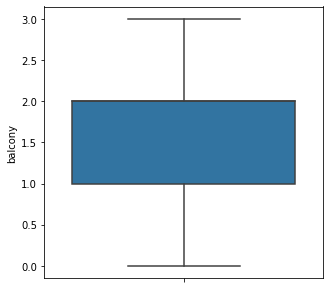

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(y="balcony",data=df)

<AxesSubplot:ylabel='price'>

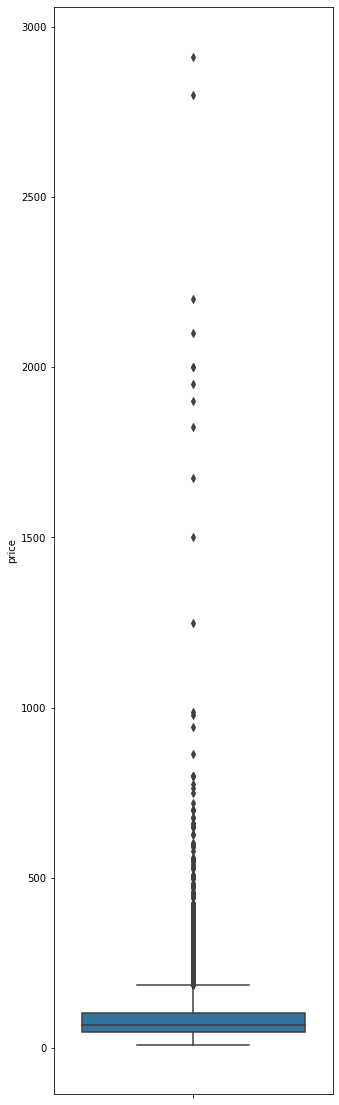

In [19]:
plt.figure(figsize=(5,20))
sns.boxplot(y="price",data=df)

<AxesSubplot:ylabel='price'>

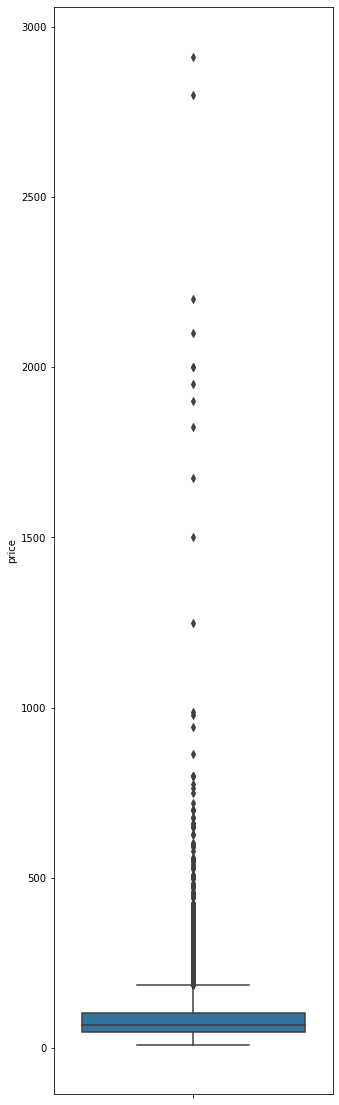

In [20]:
plt.figure(figsize=(5,20))
sns.boxplot(y="price",data=df)

<AxesSubplot:ylabel='bhk'>

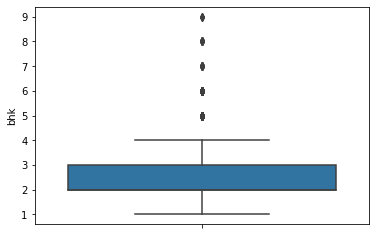

In [21]:
sns.boxplot(y="bhk",data=df)

<AxesSubplot:ylabel='price_per_sqft'>

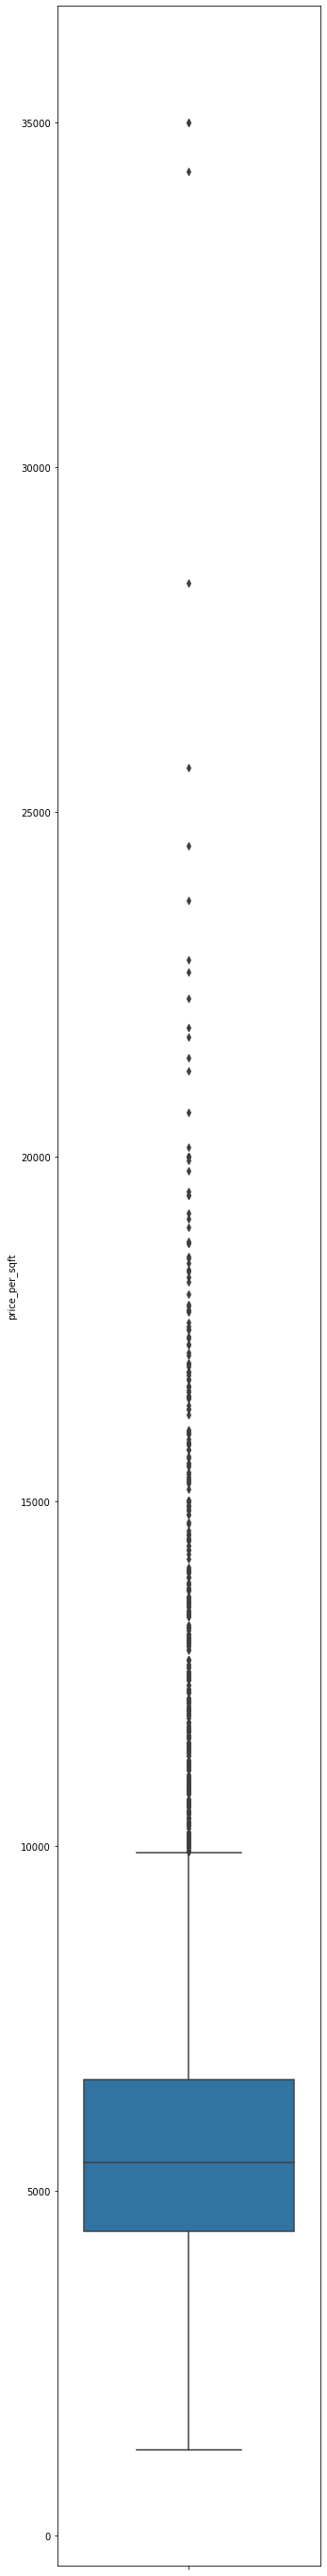

In [22]:
plt.figure(figsize=(5,50))
sns.boxplot(y="price_per_sqft",data=df)

In [23]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df['price'] = df['price']*100
df['price'] = df['price'].astype(int)
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,15000,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,14900,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,15000,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,4000,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,8300,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# Location Wise Models
1) location_Akshaya Nagar

In [25]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [26]:
df1=df[df['location_Akshaya Nagar']==1]

In [27]:
df1 = df1[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(4), int32(1), int64(103)
memory usage: 5.8 MB


In [29]:
df1.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.222789,0.734504,0.856289,0.598122,0.159468,-0.052353,0.052353,NaN,0.163371
balcony,0.222789,1.000000,0.470165,0.438457,0.544433,0.320283,-0.108342,0.108342,NaN,0.113869
price,0.734504,0.470165,1.000000,0.911175,0.853819,0.663316,0.036540,-0.036540,NaN,0.041078
total_sqft_int,0.856289,0.438457,0.911175,1.000000,0.782470,0.302145,0.033293,-0.033293,NaN,0.192692
bhk,0.598122,0.544433,0.853819,0.782470,1.000000,0.584943,-0.065259,0.065259,NaN,0.047274
price_per_sqft,0.159468,0.320283,0.663316,0.302145,0.584943,1.000000,0.021737,-0.021737,NaN,-0.291800
area_typeSuper built-up Area,-0.052353,-0.108342,0.036540,0.033293,-0.065259,0.021737,1.000000,-1.000000,NaN,-0.113633
area_typeBuilt-up Area,0.052353,0.108342,-0.036540,-0.033293,0.065259,-0.021737,-1.000000,1.000000,NaN,0.113633
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,0.163371,0.113869,0.041078,0.192692,0.047274,-0.291800,-0.113633,0.113633,NaN,1.000000


<AxesSubplot:ylabel='bath'>

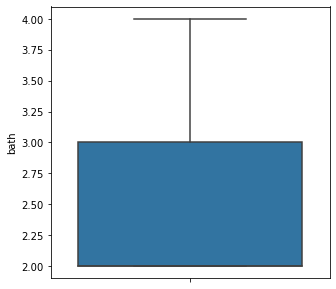

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bath',data=df1)

<AxesSubplot:ylabel='balcony'>

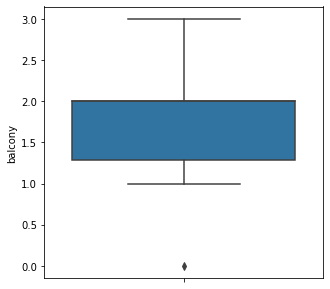

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balcony',data=df1)

<AxesSubplot:ylabel='price'>

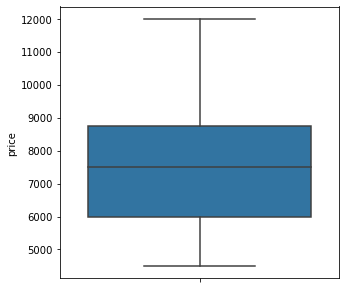

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price',data=df1)

<AxesSubplot:ylabel='total_sqft_int'>

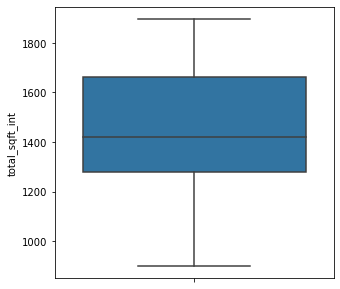

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='total_sqft_int',data=df1)

<AxesSubplot:ylabel='bhk'>

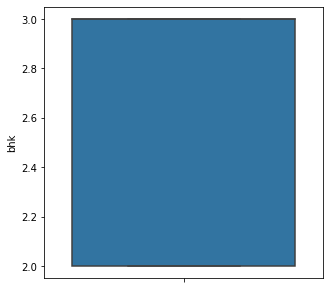

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bhk',data=df1)

<AxesSubplot:ylabel='price_per_sqft'>

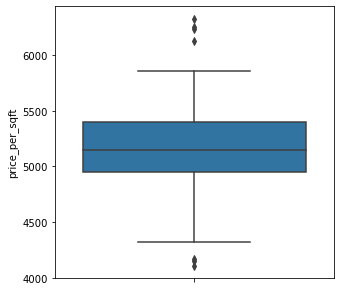

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price_per_sqft',data=df1)

In [36]:
df1.reset_index(inplace=True)
df1.columns

Index(['index', 'bath', 'balcony', 'price', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move'],
      dtype='object')

In [37]:
df1.drop(columns='index',inplace=True)
df1['pi']=df1['price'].astype(int)
df1.shape

(43, 11)

In [38]:
df1[df1['price_per_sqft']<=4200]

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,pi
0,2.0,3.0,5700,1388.0,2,4106.628242,1,0,0,1,5700
16,2.0,1.0,5000,1200.0,2,4166.666667,1,0,0,1,5000
31,2.0,1.0,5400,1300.0,2,4153.846154,1,0,0,1,5400


In [39]:
df1[df1['price_per_sqft']>=6000]

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,pi
4,3.0,2.0,12000,1897.0,3,6325.777543,1,0,0,1,12000
6,2.0,2.0,8500,1360.0,3,6250.000000,1,0,0,0,8500
27,2.0,3.0,8800,1412.0,3,6232.294618,1,0,0,1,8800
30,2.0,3.0,8700,1419.0,3,6131.078224,1,0,0,1,8700


In [40]:
df1=df1[(df1.price_per_sqft>=4200) & (df1.price_per_sqft<=6000)]
df1.shape

(36, 11)

In [41]:
x = df1[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df1[['price']]

In [42]:
# acc= []
# for i in range (1,20):
#     knn = sn.KNeighborsClassifier(n_neighbors=i)
#     m  = knn.fit(x,y)
#     predy = m.predict(x)
#     acc.append(sm.accuracy_score(predy,y.values.reshape(-1,1)))
#     print('k=',i,acc)

In [43]:
acc= []
for i in range (1,20):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    m  = knn.fit(x,y)
    predy = m.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6944444444444444]
k= 3 [1.0, 0.6944444444444444, 0.5]
k= 4 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667]
k= 5 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667]
k= 6 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889]
k= 7 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556]
k= 8 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556, 0.3055555555555556]
k= 9 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556, 0.3055555555555556, 0.25]
k= 10 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556, 0.3055555555555556, 0.25, 0.25]
k= 11 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556, 0.3055555555555556, 0.25, 0.25, 0.

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [44]:
max(acc)

1.0

In [45]:
k = acc.index(max(acc))+1
k

1

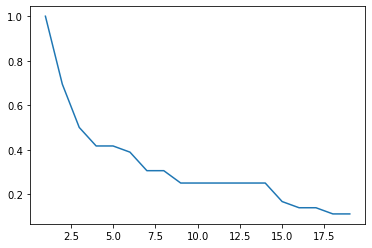

In [46]:
plt.plot(range(1,20),acc)

In [47]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
m  = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 2) location_Ambedkar Nagar

In [48]:
df2 = df[df['location_Ambedkar Nagar']==1]
df2.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [49]:
df2= df2[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [50]:
df.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
bath,1.000000,0.283192,0.523941,0.653435,0.882461,0.350497,-0.118940,0.030143,0.161243,0.022495,...,-0.010388,-0.019047,-0.015385,0.002339,0.049603,0.011201,-0.020635,0.006606,-0.017608,-0.002474
balcony,0.283192,1.000000,0.138946,0.200648,0.269511,0.068018,0.120220,-0.048382,-0.138809,0.117337,...,0.027585,-0.015110,-0.018297,0.022038,0.024569,-0.020262,0.022541,0.000445,0.008764,-0.018788
price,0.523941,0.138946,1.000000,0.797955,0.497817,0.717821,-0.114594,-0.014613,0.229543,0.012542,...,-0.015052,-0.023918,-0.017011,0.019606,0.045600,0.000618,-0.021200,0.019573,-0.015800,-0.006216
total_sqft_int,0.653435,0.200648,0.797955,1.000000,0.647485,0.376673,-0.133719,0.014041,0.219383,0.009710,...,-0.012294,-0.021914,-0.016353,0.003619,0.037007,0.007224,-0.015287,0.007875,-0.011000,-0.010931
bhk,0.882461,0.269511,0.497817,0.647485,1.000000,0.323285,-0.142496,0.044187,0.178557,0.043887,...,-0.009725,-0.021754,-0.011599,-0.002366,0.043803,0.016102,-0.026186,0.005351,-0.010418,0.008504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Hosur Road,0.011201,-0.020262,0.000618,0.007224,0.016102,0.001412,0.001408,0.001151,-0.003231,-0.036076,...,-0.003028,-0.003028,-0.002958,-0.002958,-0.002958,1.000000,-0.002887,-0.002887,-0.002887,-0.002887
location_Horamavu Banaswadi,-0.020635,0.022541,-0.021200,-0.015287,-0.026186,-0.037227,0.024451,-0.018187,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,1.000000,-0.002817,-0.002817,-0.002817
location_Domlur,0.006606,0.000445,0.019573,0.007875,0.005351,0.054259,0.006048,0.002433,-0.013638,0.020595,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,1.000000,-0.002817,-0.002817
location_Mahadevpura,-0.017608,0.008764,-0.015800,-0.011000,-0.010418,-0.023633,0.030585,-0.025060,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,-0.002817,1.000000,-0.002817


<AxesSubplot:ylabel='bath'>

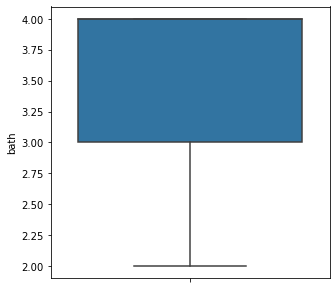

In [51]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bath',data=df2)

<AxesSubplot:ylabel='balcony'>

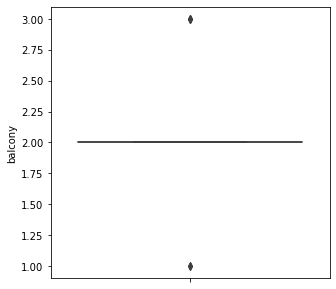

In [52]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balcony',data=df2)

<AxesSubplot:ylabel='price'>

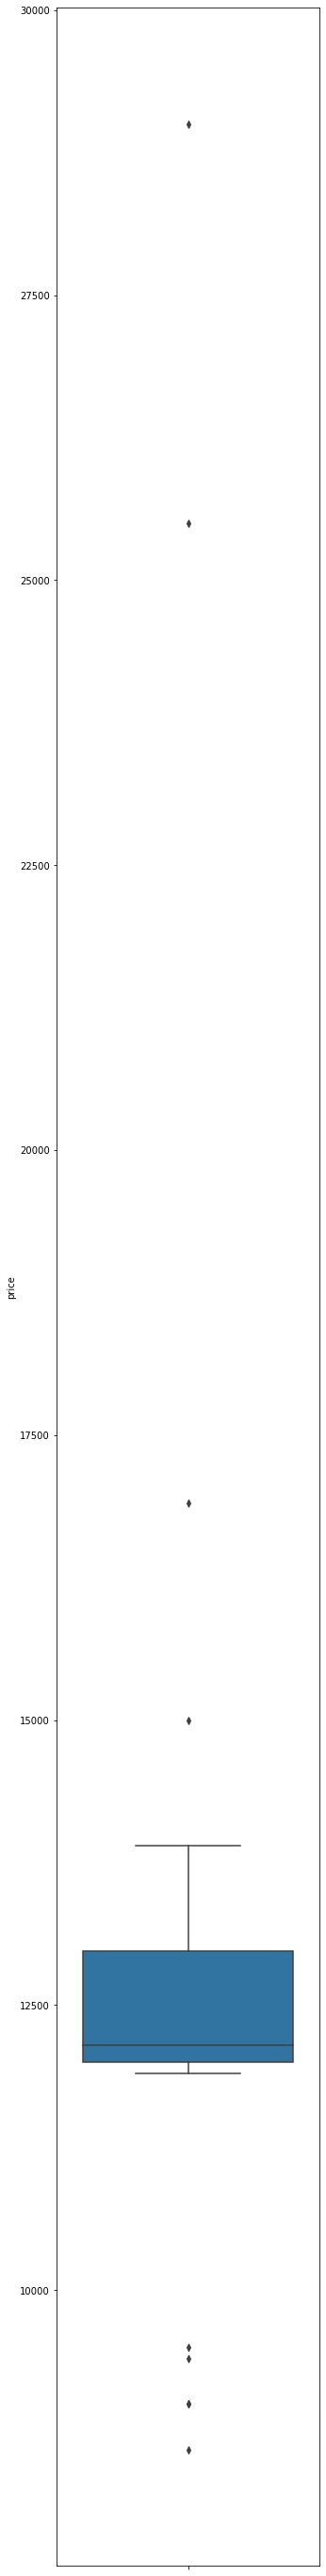

In [53]:
plt.figure(figsize=(5,50))
sns.boxplot(y='price',data=df2)

<AxesSubplot:ylabel='price'>

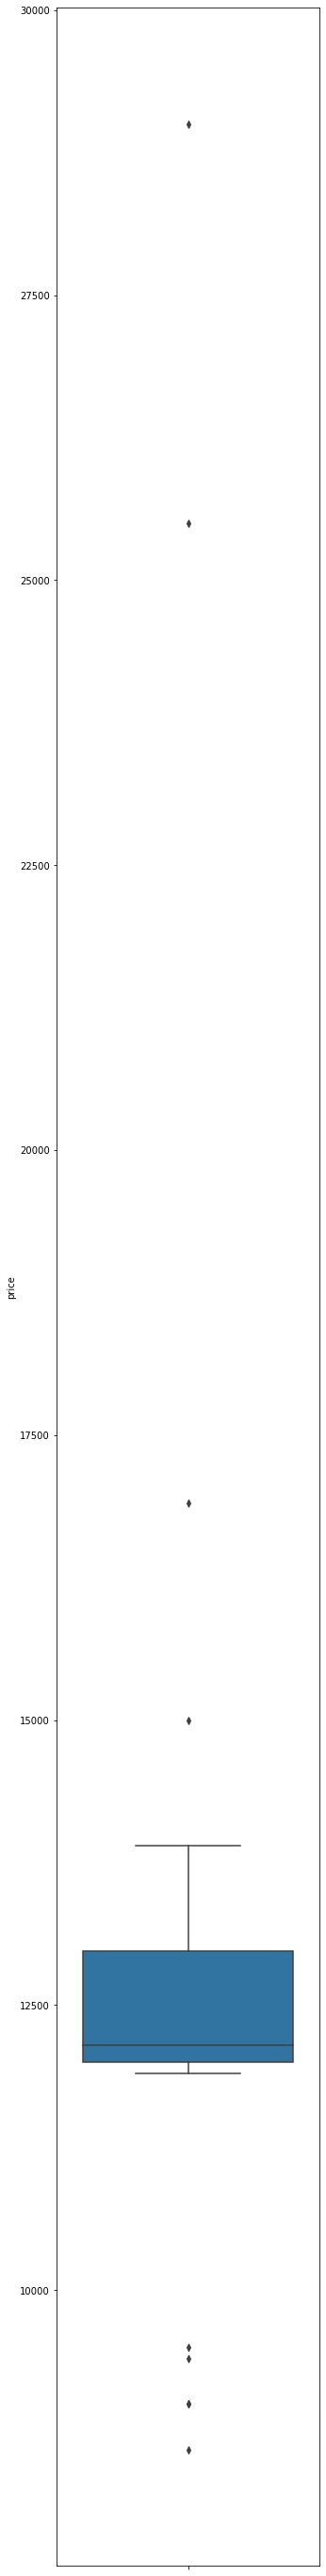

In [54]:
plt.figure(figsize=(5,50))
sns.boxplot(y='price',data=df2)

<AxesSubplot:ylabel='bhk'>

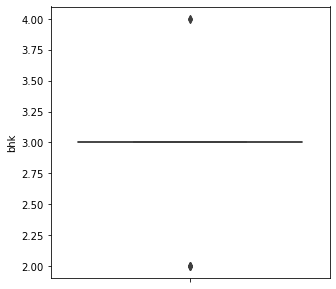

In [55]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bhk',data=df2)

<AxesSubplot:ylabel='price_per_sqft'>

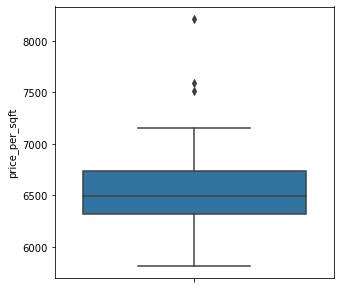

In [56]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price_per_sqft',data=df2)

In [57]:
df2.shape

(26, 10)

In [58]:
x = df2[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df2[['price']]

In [59]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6153846153846154]
k= 3 [1.0, 0.6153846153846154, 0.3076923076923077]
k= 4 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077]
k= 5 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 6 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 7 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 8 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 9 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.23076923076923078]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

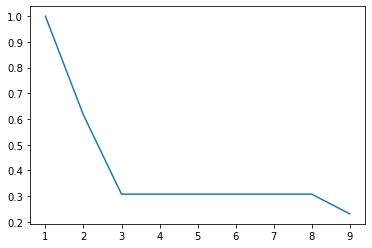

In [60]:
plt.plot(range(1,10),acc)

In [61]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 3) location_Ananth Nagar

In [62]:
df3 = df[df['location_Ananth Nagar']==1]

In [63]:
df3 = df3[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df3.corr()


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.219396,0.807758,0.853859,0.914207,0.323123,-0.286972,0.286972,NaN,0.467615
balcony,0.219396,1.000000,0.179598,0.234227,0.142138,0.000931,-0.144639,0.144639,NaN,-0.135230
price,0.807758,0.179598,1.000000,0.901780,0.869228,0.672888,-0.384688,0.384688,NaN,0.530353
total_sqft_int,0.853859,0.234227,0.901780,1.000000,0.937567,0.296112,-0.188688,0.188688,NaN,0.351417
bhk,0.914207,0.142138,0.869228,0.937567,1.000000,0.332861,-0.302372,0.302372,NaN,0.522998
price_per_sqft,0.323123,0.000931,0.672888,0.296112,0.332861,1.000000,-0.515707,0.515707,NaN,0.614228
area_typeSuper built-up Area,-0.286972,-0.144639,-0.384688,-0.188688,-0.302372,-0.515707,1.000000,-1.000000,NaN,-0.411377
area_typeBuilt-up Area,0.286972,0.144639,0.384688,0.188688,0.302372,0.515707,-1.000000,1.000000,NaN,0.411377
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,0.467615,-0.135230,0.530353,0.351417,0.522998,0.614228,-0.411377,0.411377,NaN,1.000000


In [64]:
df3

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
483,1.0,1.0,1400,500.0,1,2800.000000,1,0,0,0
484,2.0,2.0,3150,1100.0,2,2863.636364,1,0,0,1
485,2.0,2.0,2455,982.0,2,2500.000000,1,0,0,0
486,2.0,2.0,1400,500.0,1,2800.000000,1,0,0,0
487,2.0,2.0,2250,900.0,2,2500.000000,1,0,0,0
488,2.0,1.0,2600,908.0,2,2863.436123,1,0,0,1
489,2.0,1.0,3500,937.0,2,3735.325507,1,0,0,1
490,2.0,3.0,3700,960.0,2,3854.166667,0,1,0,1
491,1.0,1.0,1400,500.0,1,2800.000000,1,0,0,0
492,2.0,1.0,2970,1000.0,2,2970.000000,1,0,0,0


In [65]:
df3.shape

(24, 10)

<AxesSubplot:ylabel='bath'>

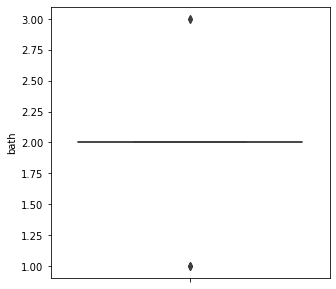

In [66]:

plt.figure(figsize=(5,5))
sns.boxplot(y='bath',data=df3)

<AxesSubplot:ylabel='balcony'>

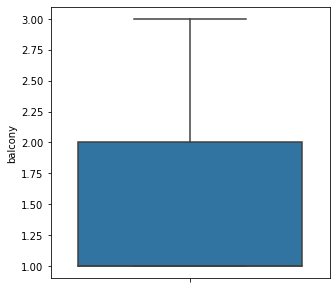

In [67]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balcony',data=df3)

<AxesSubplot:ylabel='price'>

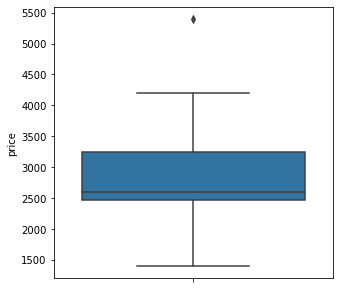

In [68]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price',data=df3)

<AxesSubplot:ylabel='total_sqft_int'>

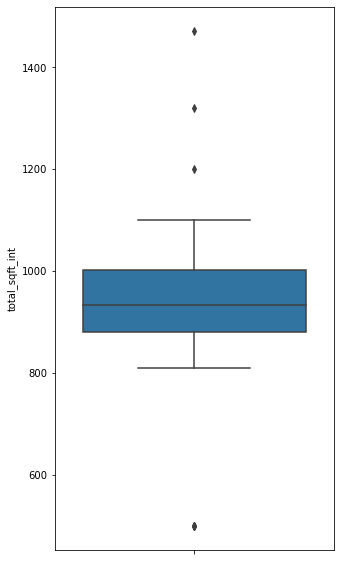

In [69]:
plt.figure(figsize=(5,10))
sns.boxplot(y='total_sqft_int',data=df3)

<AxesSubplot:ylabel='bhk'>

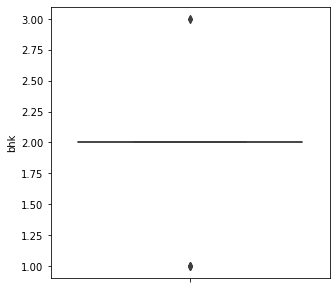

In [70]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bhk',data=df3)

<AxesSubplot:ylabel='price_per_sqft'>

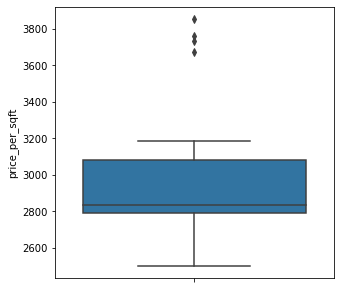

In [71]:

plt.figure(figsize=(5,5))
sns.boxplot(y='price_per_sqft',data=df3)

In [72]:
x = df3[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df3[['price']]

In [73]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5416666666666666]
k= 3 [1.0, 0.5416666666666666, 0.375]
k= 4 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333]
k= 5 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667]
k= 6 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667, 0.25]
k= 7 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667, 0.25, 0.2916666666666667]
k= 8 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667, 0.25, 0.2916666666666667, 0.2916666666666667]
k= 9 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667, 0.25, 0.2916666666666667, 0.2916666666666667, 0.2916666666666667]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

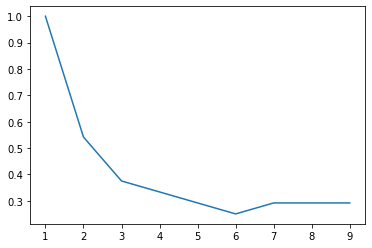

In [74]:
plt.plot(range(1,10),acc)

In [75]:
import numpy as np

In [76]:
er = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    er.append(np.mean(predy!=y['price']))
    print('k=',i,er)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [0.0]
k= 2 [0.0, 0.4583333333333333]
k= 3 [0.0, 0.4583333333333333, 0.625]
k= 4 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666]
k= 5 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334]
k= 6 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75]
k= 7 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75, 0.7083333333333334]
k= 8 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75, 0.7083333333333334, 0.7083333333333334]
k= 9 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [77]:
min(er)

0.0

In [78]:
k = er.index(min(er))+1
k

1

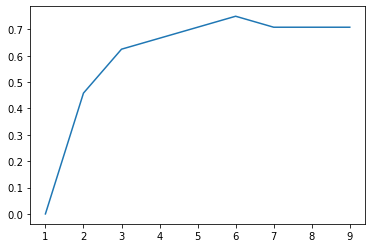

In [79]:
plt.plot(range(1,10),er)

In [80]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 4) location_Anekal

In [81]:
df4 = df[df['location_Anekal']==1]
df4 = df4[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df4.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.208860,0.812555,0.678105,7.457111e-01,0.669263,0.146667,-0.292770,0.051640,3.614784e-01
balcony,0.208860,1.000000,0.045825,-0.065844,1.735177e-01,0.460782,0.470960,-0.329720,-0.237915,7.930516e-02
price,0.812555,0.045825,1.000000,0.951987,8.483199e-01,0.552591,-0.161952,-0.451092,0.455179,-1.678166e-02
total_sqft_int,0.678105,-0.065844,0.951987,1.000000,8.479637e-01,0.292863,-0.389519,-0.473652,0.690442,-2.045397e-01
bhk,0.745711,0.173518,0.848320,0.847964,1.000000e+00,0.439749,-0.188311,-0.385922,0.437595,-4.858280e-17
price_per_sqft,0.669263,0.460782,0.552591,0.292863,4.397487e-01,1.000000,0.601721,-0.341114,-0.356988,3.200407e-01
area_typeSuper built-up Area,0.146667,0.470960,-0.161952,-0.389519,-1.883109e-01,0.601721,1.000000,-0.292770,-0.774597,4.303315e-01
area_typeBuilt-up Area,-0.292770,-0.329720,-0.451092,-0.473652,-3.859225e-01,-0.341114,-0.292770,1.000000,-0.377964,3.779645e-01
area_typePlot Area,0.051640,-0.237915,0.455179,0.690442,4.375950e-01,-0.356988,-0.774597,-0.377964,1.000000,-6.666667e-01
availability_Ready To Move,0.361478,0.079305,-0.016782,-0.204540,-4.858280e-17,0.320041,0.430331,0.377964,-0.666667,1.000000e+00


In [82]:

df4.set_index('total_sqft_int').sort_index()

,bath,balcony,price,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
total_sqft_int,,,,,,,,,
400.0,1.0,1.0,1150,1,2875.000000,0,1,0,1
420.0,1.0,1.0,1250,1,2976.190476,0,1,0,1
456.0,1.0,1.0,1500,1,3289.473684,1,0,0,1
530.0,1.0,1.0,1800,1,3396.226415,1,0,0,0
600.0,1.0,1.0,1650,1,2750.000000,1,0,0,1
700.0,1.0,0.0,1939,2,2771.428571,0,1,0,1
766.0,2.0,2.0,2800,2,3655.352480,1,0,0,1
888.0,2.0,1.0,3400,2,3828.828829,1,0,0,1
925.0,2.0,1.0,4000,2,4324.324324,1,0,0,1


<AxesSubplot:ylabel='bath'>

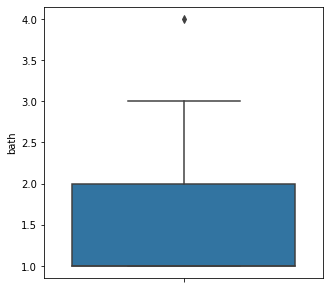

In [83]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bath',data=df4)

<AxesSubplot:ylabel='balcony'>

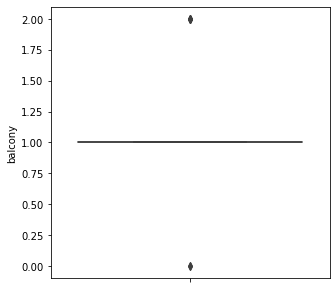

In [84]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balcony',data=df4)

<AxesSubplot:ylabel='price'>

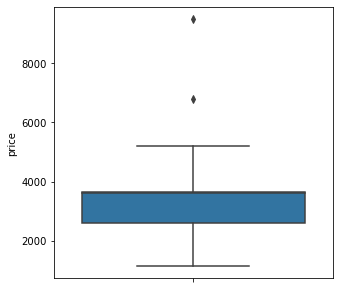

In [85]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price',data=df4)

<AxesSubplot:ylabel='total_sqft_int'>

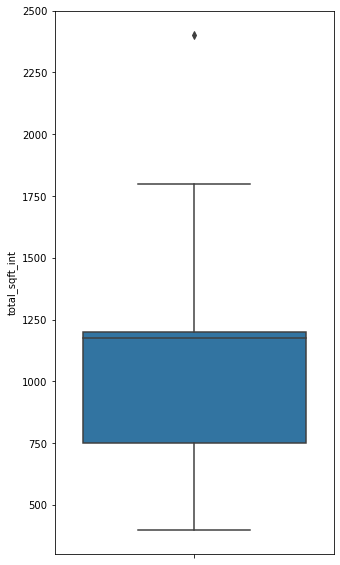

In [86]:
plt.figure(figsize=(5,10))
sns.boxplot(y='total_sqft_int',data=df4)

<AxesSubplot:ylabel='bhk'>

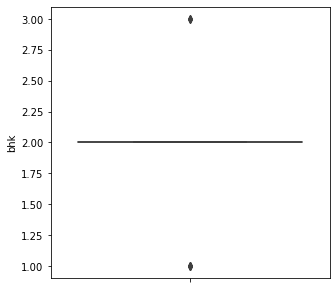

In [87]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bhk',data=df4)


<AxesSubplot:ylabel='price_per_sqft'>

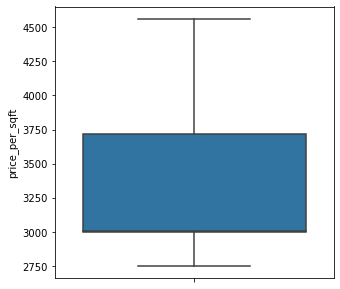

In [88]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price_per_sqft',data=df4)

In [89]:
x = df4[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df4[['price']]

In [90]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7083333333333334]
k= 3 [1.0, 0.7083333333333334, 0.5416666666666666]
k= 4 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333]
k= 5 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333]
k= 6 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.3333333333333333]
k= 7 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.3333333333333333, 0.3333333333333333]
k= 8 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.3333333333333333, 0.3333333333333333, 0.2916666666666667]
k= 9 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.3333333333333333, 0.3333333333333333, 0.2916666666666667, 0.2916666666666667]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [91]:
max(acc)

1.0

In [92]:
k = acc.index(max(acc))+1
k

1

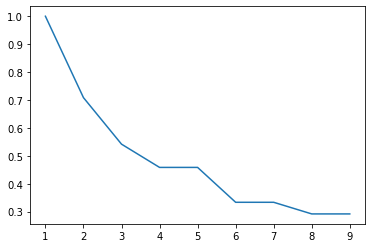

In [93]:
plt.plot(range(1,10),acc)

# 5) location_Attibele

In [94]:
df5 = df[df['location_Attibele']==1]
df5 = df5[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df5

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
592,1.0,1.0,1100,450.0,1,2444.444444,1,0,0,1
593,4.0,0.0,5280,1600.0,4,3300.000000,0,1,0,1
594,1.0,1.0,1100,400.0,1,2750.000000,0,1,0,1
595,1.0,1.0,1200,400.0,1,3000.000000,0,1,0,1
596,1.0,1.0,1400,400.0,1,3500.000000,0,1,0,1
597,1.0,1.0,1700,500.0,1,3400.000000,1,0,0,1
598,4.0,2.0,9500,2168.0,4,4381.918819,0,0,1,1
599,1.0,1.0,1025,395.0,1,2594.936709,0,1,0,1
600,1.0,1.0,1700,420.0,1,4047.619048,0,1,0,1
601,1.0,1.0,1200,418.0,1,2870.813397,0,1,0,1


In [95]:
df5.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.299895,0.847573,0.894598,0.955036,0.646868,-0.287290,-0.064514,0.579447,-0.103882
balcony,0.299895,1.000000,0.639729,0.526194,0.299895,0.600537,-0.251123,0.137253,0.167053,0.029161
price,0.847573,0.639729,1.000000,0.981170,0.868003,0.824892,-0.302542,-0.025119,0.533677,-0.110471
total_sqft_int,0.894598,0.526194,0.981170,1.000000,0.926290,0.751468,-0.260928,-0.071231,0.548720,-0.083457
bhk,0.955036,0.299895,0.868003,0.926290,1.000000,0.658458,-0.287290,-0.064514,0.579447,-0.103882
price_per_sqft,0.646868,0.600537,0.824892,0.751468,0.658458,1.000000,-0.463457,0.115140,0.540033,-0.317555
area_typeSuper built-up Area,-0.287290,-0.251123,-0.302542,-0.260928,-0.287290,-0.463457,1.000000,-0.714006,-0.253320,0.140028
area_typeBuilt-up Area,-0.064514,0.137253,-0.025119,-0.071231,-0.064514,0.115140,-0.714006,1.000000,-0.384353,0.212459
area_typePlot Area,0.579447,0.167053,0.533677,0.548720,0.579447,0.540033,-0.253320,-0.384353,1.000000,-0.552771
availability_Ready To Move,-0.103882,0.029161,-0.110471,-0.083457,-0.103882,-0.317555,0.140028,0.212459,-0.552771,1.000000


In [96]:
x = df5[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df5[['price']]

In [97]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.36]
k= 3 [1.0, 0.36, 0.36]
k= 4 [1.0, 0.36, 0.36, 0.32]
k= 5 [1.0, 0.36, 0.36, 0.32, 0.28]
k= 6 [1.0, 0.36, 0.36, 0.32, 0.28, 0.24]
k= 7 [1.0, 0.36, 0.36, 0.32, 0.28, 0.24, 0.2]
k= 8 [1.0, 0.36, 0.36, 0.32, 0.28, 0.24, 0.2, 0.24]
k= 9 [1.0, 0.36, 0.36, 0.32, 0.28, 0.24, 0.2, 0.24, 0.16]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [98]:
max(acc)

1.0

In [99]:
k = acc.index(max(acc))+1
k

1

In [100]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


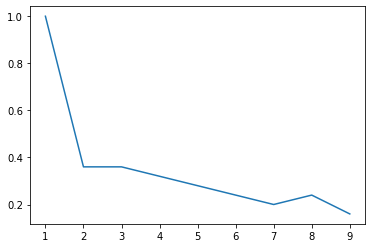

In [101]:
plt.plot(range(1,10),acc)

# 6) location_Balagere

In [102]:
df6 = df[df['location_Balagere']==1]
df6 = df6[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df6

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
724,2.0,1.0,8090,1210.00,2,6685.950413,1,0,0,1
725,2.0,1.0,7200,1210.00,2,5950.413223,1,0,0,1
726,2.0,1.0,7850,1205.00,2,6514.522822,1,0,0,1
727,1.0,0.0,4190,790.50,1,5300.442758,1,0,0,0
728,2.0,1.0,6838,1020.07,2,6703.461527,1,0,0,0
729,2.0,1.0,8100,1205.47,2,6719.370868,1,0,0,0
730,2.0,1.0,6500,1007.00,2,6454.816286,1,0,0,0
731,2.0,1.0,7400,1210.00,2,6115.702479,1,0,0,0
732,2.0,1.0,8300,1210.00,2,6859.504132,1,0,0,1
733,1.0,1.0,4500,675.00,1,6666.666667,0,1,0,0


In [103]:
df6.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.402980,0.931076,0.912971,1.000000,0.632005,0.156098,-0.156098,NaN,0.353393
balcony,0.402980,1.000000,0.338823,0.230706,0.402980,0.561722,-0.113228,0.113228,NaN,0.206725
price,0.931076,0.338823,1.000000,0.973577,0.931076,0.683688,0.164058,-0.164058,NaN,0.382803
total_sqft_int,0.912971,0.230706,0.973577,1.000000,0.912971,0.505251,0.255416,-0.255416,NaN,0.360782
bhk,1.000000,0.402980,0.931076,0.912971,1.000000,0.632005,0.156098,-0.156098,NaN,0.353393
price_per_sqft,0.632005,0.561722,0.683688,0.505251,0.632005,1.000000,-0.239901,0.239901,NaN,0.317950
area_typeSuper built-up Area,0.156098,-0.113228,0.164058,0.255416,0.156098,-0.239901,1.000000,-1.000000,NaN,-0.121716
area_typeBuilt-up Area,-0.156098,0.113228,-0.164058,-0.255416,-0.156098,0.239901,-1.000000,1.000000,NaN,0.121716
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,0.353393,0.206725,0.382803,0.360782,0.353393,0.317950,-0.121716,0.121716,NaN,1.000000


In [104]:
x = df6[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df6[['price']]

In [105]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.5714285714285714]
k= 3 [1.0, 0.5714285714285714, 0.39285714285714285]
k= 4 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25]
k= 5 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25]
k= 6 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25, 0.25]
k= 7 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25, 0.25, 0.21428571428571427]
k= 8 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25, 0.25, 0.21428571428571427, 0.21428571428571427]
k= 9 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25, 0.25, 0.21428571428571427, 0.21428571428571427, 0.21428571428571427]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [106]:
max(acc)

1.0

In [107]:
k = acc.index(max(acc))+1
k

1

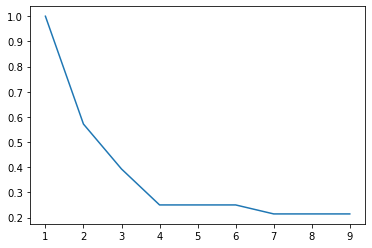

In [108]:
plt.plot(range(1,10),acc)

In [109]:
knn = sn.KNeighborsClassifier(n_neighbors=1) 
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 7) location_Banashankari

In [110]:
df7 = df[df['location_Banashankari']==1]
df7 = df7[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df7.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.225001,0.321348,0.540711,0.809887,0.032716,-0.059585,0.059585,NaN,-0.360856
balcony,0.225001,1.000000,-0.082991,-0.028660,0.064607,-0.102216,-0.019202,0.019202,NaN,0.011822
price,0.321348,-0.082991,1.000000,0.859159,0.366219,0.767983,-0.013329,0.013329,NaN,-0.143749
total_sqft_int,0.540711,-0.028660,0.859159,1.000000,0.466673,0.370357,0.006230,-0.006230,NaN,-0.240376
bhk,0.809887,0.064607,0.366219,0.466673,1.000000,0.163888,-0.231377,0.231377,NaN,-0.293813
price_per_sqft,0.032716,-0.102216,0.767983,0.370357,0.163888,1.000000,-0.049061,0.049061,NaN,-0.049831
area_typeSuper built-up Area,-0.059585,-0.019202,-0.013329,0.006230,-0.231377,-0.049061,1.000000,-1.000000,NaN,-0.177187
area_typeBuilt-up Area,0.059585,0.019202,0.013329,-0.006230,0.231377,0.049061,-1.000000,1.000000,NaN,0.177187
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-0.360856,0.011822,-0.143749,-0.240376,-0.293813,-0.049831,-0.177187,0.177187,NaN,1.000000


<AxesSubplot:ylabel='balcony'>

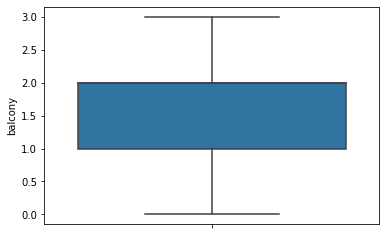

In [111]:
sns.boxplot(y='balcony',data=df7)


<AxesSubplot:ylabel='price'>

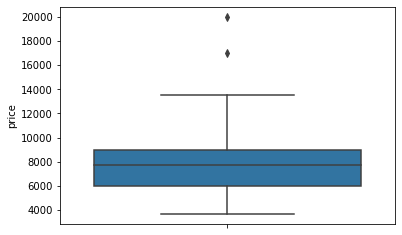

In [112]:
sns.boxplot(y='price',data=df7)

<AxesSubplot:ylabel='total_sqft_int'>

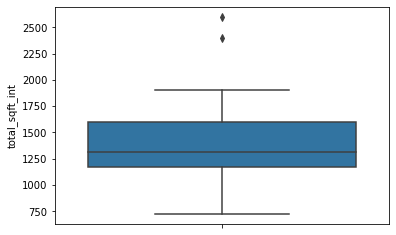

In [113]:
sns.boxplot(y='total_sqft_int',data=df7)

<AxesSubplot:xlabel='price', ylabel='balcony'>

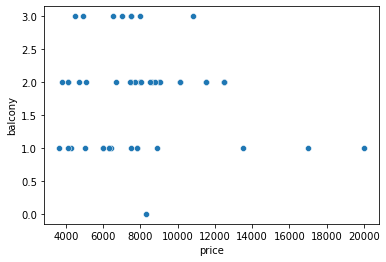

In [114]:
sns.scatterplot(x='price',y='balcony',data=df7)

In [115]:
x = df7[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df7[['price']]

In [116]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.4897959183673469]
k= 3 [1.0, 0.4897959183673469, 0.3673469387755102]
k= 4 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041]
k= 5 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041]
k= 6 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041, 0.30612244897959184]
k= 7 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041, 0.30612244897959184, 0.2857142857142857]
k= 8 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041, 0.30612244897959184, 0.2857142857142857, 0.30612244897959184]
k= 9 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041, 0.30612244897959184, 0.2857142857142857, 0.30612244897959184, 0.2653061224489796]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [117]:
max(acc)

1.0

In [118]:
k = acc.index(max(acc))+1
k

1

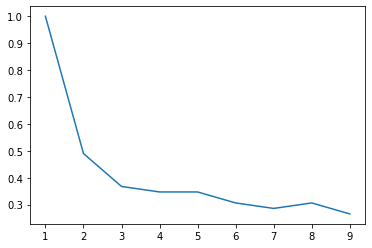

In [119]:
plt.plot(range(1,10),acc)

In [120]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 8) location_Bannerghatta Road

In [121]:
df8 = df[df['location_Bannerghatta Road']==1]

In [122]:
df8 = df8[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [123]:
df8.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.207973,0.834023,0.866822,0.843231,0.490726,-0.006278,-0.010875,NaN,-0.072650
balcony,0.207973,1.000000,0.336026,0.304285,0.312209,0.294000,0.182913,-0.195967,NaN,0.187794
price,0.834023,0.336026,1.000000,0.898774,0.819633,0.764032,0.047476,-0.066959,NaN,0.010580
total_sqft_int,0.866822,0.304285,0.898774,1.000000,0.859022,0.444184,0.009076,-0.023373,NaN,-0.040927
bhk,0.843231,0.312209,0.819633,0.859022,1.000000,0.508446,0.013254,-0.059700,NaN,0.032846
price_per_sqft,0.490726,0.294000,0.764032,0.444184,0.508446,1.000000,0.118297,-0.147736,NaN,0.032788
area_typeSuper built-up Area,-0.006278,0.182913,0.047476,0.009076,0.013254,0.118297,1.000000,-0.940441,NaN,-0.158701
area_typeBuilt-up Area,-0.010875,-0.195967,-0.066959,-0.023373,-0.059700,-0.147736,-0.940441,1.000000,NaN,0.138267
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-0.072650,0.187794,0.010580,-0.040927,0.032846,0.032788,-0.158701,0.138267,NaN,1.000000


In [124]:
x = df8[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df8[['price']]


In [125]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5462962962962963]
k= 3 [1.0, 0.5462962962962963, 0.3611111111111111]
k= 4 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963]
k= 5 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924]
k= 6 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924, 0.23148148148148148]
k= 7 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924, 0.23148148148148148, 0.19444444444444445]
k= 8 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924, 0.23148148148148148, 0.19444444444444445, 0.21296296296296297]
k= 9 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924, 0.23148148148148148, 0.19444444444444445, 0.21296296296296297, 0.2222222222222222]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [126]:
max(acc)

1.0

In [127]:
k=acc.index(max(acc))+1

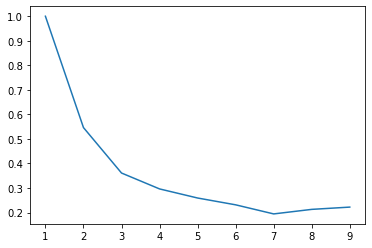

In [128]:
plt.plot(range(1,10),acc)

In [129]:

knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 9) location_Begur Road

In [130]:
df9 = df[df['location_Begur Road']==1]

In [131]:
df9 = df9[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df9.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,-0.389870,0.592212,0.556837,0.540062,0.340699,-0.346205,0.167360,0.387298,-0.239756
balcony,-0.389870,1.000000,0.130644,0.273895,0.232029,-0.154833,0.275540,-0.013813,-0.510851,0.370475
price,0.592212,0.130644,1.000000,0.873932,0.863714,0.668044,-0.038535,0.021638,0.038001,-0.254139
total_sqft_int,0.556837,0.273895,0.873932,1.000000,0.879946,0.228617,0.016236,0.024401,-0.072893,0.020533
bhk,0.540062,0.232029,0.863714,0.879946,1.000000,0.411926,-0.117114,0.010564,0.209165,-0.081105
price_per_sqft,0.340699,-0.154833,0.668044,0.228617,0.411926,1.000000,-0.129473,0.026652,0.205828,-0.545348
area_typeSuper built-up Area,-0.346205,0.275540,-0.038535,0.016236,-0.117114,-0.129473,1.000000,-0.856957,-0.484768,-0.058938
area_typeBuilt-up Area,0.167360,-0.013813,0.021638,0.024401,0.010564,0.026652,-0.856957,1.000000,-0.035355,0.050508
area_typePlot Area,0.387298,-0.510851,0.038001,-0.072893,0.209165,0.205828,-0.484768,-0.035355,1.000000,0.028571
availability_Ready To Move,-0.239756,0.370475,-0.254139,0.020533,-0.081105,-0.545348,-0.058938,0.050508,0.028571,1.000000


In [132]:
x = df9[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df9[['price']]

In [133]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7058823529411765]
k= 3 [1.0, 0.7058823529411765, 0.45098039215686275]
k= 4 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786]
k= 5 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315]
k= 6 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315, 0.37254901960784315]
k= 7 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315, 0.37254901960784315, 0.3333333333333333]
k= 8 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315, 0.37254901960784315, 0.3333333333333333, 0.3333333333333333]
k= 9 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315, 0.37254901960784315, 0.3333333333333333, 0.3333333333333333, 0.23529411764705882]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [134]:
max(acc)

1.0

In [135]:
k = acc.index(max(acc))+1
k

1

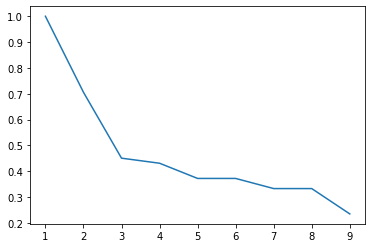

In [136]:

plt.plot(range(1,10),acc)

In [137]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 10) location_Bellandur

In [138]:
df10 = df[df['location_Bellandur']==1]
df10 = df10[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df10

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1114,3.0,1.000000,10300,1767.0,3,5829.088851,1,0,0,1
1115,2.0,3.000000,6600,1205.0,2,5477.178423,0,1,0,1
1116,2.0,1.000000,7600,1250.0,2,6080.000000,1,0,0,1
1117,2.0,2.000000,5000,1000.0,2,5000.000000,1,0,0,1
1118,2.0,1.000000,7400,1281.0,2,5776.736924,1,0,0,1
1119,2.0,2.000000,4000,921.0,2,4343.105320,1,0,0,1
1120,2.0,2.000000,9800,1490.0,3,6577.181208,1,0,0,1
1121,2.0,2.000000,6000,1220.0,2,4918.032787,1,0,0,1
1122,2.0,2.000000,8200,1299.0,2,6312.548114,1,0,0,1
1123,2.0,2.000000,5600,900.0,2,6222.222222,1,0,0,1


In [139]:
df10.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.405878,0.800221,0.806780,0.855191,0.462747,-0.335095,0.335095,NaN,-0.178281
balcony,0.405878,1.000000,0.252167,0.230465,0.351102,0.234160,-0.187817,0.187817,NaN,-0.372962
price,0.800221,0.252167,1.000000,0.964414,0.837293,0.651602,-0.298279,0.298279,NaN,-0.157347
total_sqft_int,0.806780,0.230465,0.964414,1.000000,0.834361,0.436669,-0.295006,0.295006,NaN,-0.125530
bhk,0.855191,0.351102,0.837293,0.834361,1.000000,0.498456,-0.240627,0.240627,NaN,-0.178281
price_per_sqft,0.462747,0.234160,0.651602,0.436669,0.498456,1.000000,-0.126449,0.126449,NaN,-0.211484
area_typeSuper built-up Area,-0.335095,-0.187817,-0.298279,-0.295006,-0.240627,-0.126449,1.000000,-1.000000,NaN,-0.020102
area_typeBuilt-up Area,0.335095,0.187817,0.298279,0.295006,0.240627,0.126449,-1.000000,1.000000,NaN,0.020102
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-0.178281,-0.372962,-0.157347,-0.125530,-0.178281,-0.211484,-0.020102,0.020102,NaN,1.000000


In [140]:
x = df10[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df10[['price']]

In [141]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6037735849056604]
k= 3 [1.0, 0.6037735849056604, 0.33962264150943394]
k= 4 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206]
k= 5 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264]
k= 6 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264, 0.22641509433962265]
k= 7 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264, 0.22641509433962265, 0.18867924528301888]
k= 8 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264, 0.22641509433962265, 0.18867924528301888, 0.1509433962264151]
k= 9 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264, 0.22641509433962265, 0.18867924528301888, 0.1509433962264151, 0.1509433962264151]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [142]:
max(acc)

1.0

In [143]:
k = acc.index(max(acc))+1
k

1

In [144]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


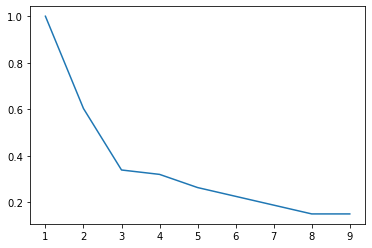

In [145]:
plt.plot(range(1,10),acc)

# 11) location_Bhoganhalli

In [146]:
df11 = df[df['location_Bhoganhalli']==1]
df11 = df11[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df11

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1193,3.0,1.0,9900,1670.0,3,5928.143713,1,0,0,0
1194,2.0,1.0,7597,1444.0,2,5261.080332,1,0,0,0
1195,2.0,1.0,7597,1447.0,2,5250.172771,1,0,0,0
1196,3.0,2.0,12600,1700.0,3,7411.764706,0,1,0,1
1197,2.0,1.0,7597,1447.0,2,5250.172771,1,0,0,0
1198,3.0,2.0,12700,1760.0,3,7215.909091,1,0,0,1
1199,2.0,1.0,7597,1447.0,2,5250.172771,1,0,0,0
1200,3.0,2.0,12900,1949.0,3,6618.778861,1,0,0,1
1201,3.0,2.0,12800,1760.0,3,7272.727273,1,0,0,1
1202,2.0,1.0,7597,1447.0,2,5250.172771,1,0,0,0


In [147]:
df11.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.783911,0.945120,0.929076,0.973844,0.798567,-0.334389,0.334389,NaN,0.658586
balcony,0.783911,1.000000,0.875103,0.802802,0.861241,0.825828,-0.073472,0.073472,NaN,0.693375
price,0.945120,0.875103,1.000000,0.968627,0.974960,0.877033,-0.155140,0.155140,NaN,0.670160
total_sqft_int,0.929076,0.802802,0.968627,1.000000,0.940702,0.736580,-0.085346,0.085346,NaN,0.536495
bhk,0.973844,0.861241,0.974960,0.940702,1.000000,0.859775,-0.226635,0.226635,NaN,0.697097
price_per_sqft,0.798567,0.825828,0.877033,0.736580,0.859775,1.000000,-0.218648,0.218648,NaN,0.784167
area_typeSuper built-up Area,-0.334389,-0.073472,-0.155140,-0.085346,-0.226635,-0.218648,1.000000,-1.000000,NaN,-0.397360
area_typeBuilt-up Area,0.334389,0.073472,0.155140,0.085346,0.226635,0.218648,-1.000000,1.000000,NaN,0.397360
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,0.658586,0.693375,0.670160,0.536495,0.697097,0.784167,-0.397360,0.397360,NaN,1.000000


In [148]:
x = df11[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df11[['price']]

In [149]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.7727272727272727]
k= 3 [1.0, 0.7727272727272727, 0.5909090909090909]
k= 4 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5]
k= 5 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5]
k= 6 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5, 0.4090909090909091]
k= 7 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5, 0.4090909090909091, 0.4090909090909091]
k= 8 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091]
k= 9 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [150]:
max(acc)

1.0

In [151]:
k = acc.index(max(acc))+1
k

1

In [152]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


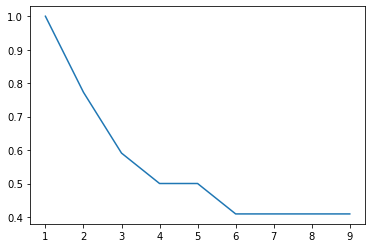

In [153]:
plt.plot(range(1,10),acc)

# 12) location_Bisuvanahalli

In [154]:
df12 = df[df['location_Bisuvanahalli']==1]

In [155]:
df12 = df12[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df12

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1248,3.0,2.0,4800,1180.0,3,4067.796610,1,0,0,1
1249,2.0,1.0,4600,1075.0,3,4279.069767,1,0,0,1
1250,2.0,1.0,4500,1075.0,3,4186.046512,1,0,0,1
1251,2.0,1.0,3300,845.0,2,3905.325444,0,1,0,1
1252,2.0,1.0,4500,1075.0,3,4186.046512,1,0,0,1
1253,2.0,1.0,3700,845.0,2,4378.698225,1,0,0,1
1254,2.0,1.0,2900,845.0,2,3431.952663,1,0,0,1
1255,2.0,1.0,4700,1075.0,3,4372.093023,1,0,0,1
1256,1.0,1.0,3200,850.0,2,3764.705882,1,0,0,1
1257,2.0,1.0,5000,1075.0,3,4651.162791,1,0,0,1


In [156]:
df12.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.347368,0.339022,0.503402,0.344378,-0.035609,0.238416,-0.238416,NaN,NaN
balcony,0.347368,1.000000,0.061546,0.146246,0.079472,-0.076228,0.326718,-0.326718,NaN,NaN
price,0.339022,0.061546,1.000000,0.885392,0.904641,0.764164,0.369102,-0.369102,NaN,NaN
total_sqft_int,0.503402,0.146246,0.885392,1.000000,0.942029,0.382279,0.452986,-0.452986,NaN,NaN
bhk,0.344378,0.079472,0.904641,0.942029,1.000000,0.512378,0.377778,-0.377778,NaN,NaN
price_per_sqft,-0.035609,-0.076228,0.764164,0.382279,0.512378,1.000000,0.091888,-0.091888,NaN,NaN
area_typeSuper built-up Area,0.238416,0.326718,0.369102,0.452986,0.377778,0.091888,1.000000,-1.000000,NaN,NaN
area_typeBuilt-up Area,-0.238416,-0.326718,-0.369102,-0.452986,-0.377778,-0.091888,-1.000000,1.000000,NaN,NaN
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
x = df12[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df12[['price']]

In [158]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.78125]
k= 3 [1.0, 0.78125, 0.6875]
k= 4 [1.0, 0.78125, 0.6875, 0.65625]
k= 5 [1.0, 0.78125, 0.6875, 0.65625, 0.46875]
k= 6 [1.0, 0.78125, 0.6875, 0.65625, 0.46875, 0.375]
k= 7 [1.0, 0.78125, 0.6875, 0.65625, 0.46875, 0.375, 0.375]
k= 8 [1.0, 0.78125, 0.6875, 0.65625, 0.46875, 0.375, 0.375, 0.34375]
k= 9 [1.0, 0.78125, 0.6875, 0.65625, 0.46875, 0.375, 0.375, 0.34375, 0.21875]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [159]:
max(acc)

1.0

In [160]:
k = acc.index(max(acc))+1
k

1

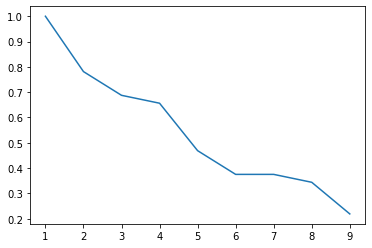

In [161]:
plt.plot(range(1,10),acc)

# 13) location_Bommasandra

In [162]:
df13 = df[df['location_Bommasandra']==1]


In [163]:
df13 = df13[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df13

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1293,3.0,1.000000,4936,1260.0,3,3917.460317,1,0,0,0
1294,3.0,2.000000,4600,1200.0,3,3833.333333,1,0,0,1
1295,2.0,1.000000,4100,1035.0,2,3961.352657,1,0,0,0
1296,2.0,1.000000,4173,1035.0,2,4031.884058,1,0,0,0
1297,2.0,3.000000,4000,1034.0,2,3868.471954,1,0,0,1
1298,2.0,2.000000,3000,877.0,2,3420.752566,0,1,0,1
1299,2.0,1.000000,3746,920.0,2,4071.739130,1,0,0,0
1300,2.0,1.000000,4143,1035.0,2,4002.898551,1,0,0,0
1301,2.0,1.000000,5028,1295.0,3,3882.625483,1,0,0,0
1302,2.0,1.000000,4000,1015.0,2,3940.886700,1,0,0,0


In [164]:
df13.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.028020,0.680668,0.769997,0.864131,0.232670,-0.056731,-0.136263,0.283654,-0.338138
balcony,0.028020,1.000000,-0.009215,-0.012653,-0.034149,-0.097911,-0.241425,0.176755,0.157079,0.519693
price,0.680668,-0.009215,1.000000,0.976790,0.717202,0.717516,-0.261905,-0.252754,0.787275,-0.464224
total_sqft_int,0.769997,-0.012653,0.976790,1.000000,0.801860,0.568315,-0.256697,-0.199128,0.704175,-0.398577
bhk,0.864131,-0.034149,0.717202,0.801860,1.000000,0.299047,-0.008830,-0.190885,0.279623,-0.309942
price_per_sqft,0.232670,-0.097911,0.717516,0.568315,0.299047,1.000000,0.019568,-0.444802,0.584673,-0.658231
area_typeSuper built-up Area,-0.056731,-0.241425,-0.261905,-0.256697,-0.008830,0.019568,1.000000,-0.800641,-0.555556,-0.256076
area_typeBuilt-up Area,-0.136263,0.176755,-0.252754,-0.199128,-0.190885,-0.444802,-0.800641,1.000000,-0.053376,0.402980
area_typePlot Area,0.283654,0.157079,0.787275,0.704175,0.279623,0.584673,-0.555556,-0.053376,1.000000,-0.132453
availability_Ready To Move,-0.338138,0.519693,-0.464224,-0.398577,-0.309942,-0.658231,-0.256076,0.402980,-0.132453,1.000000


In [165]:
x = df13[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df13[['price']]

In [166]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5357142857142857]
k= 3 [1.0, 0.5357142857142857, 0.42857142857142855]
k= 4 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145]
k= 5 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857]
k= 6 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857, 0.25]
k= 7 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857, 0.25, 0.2857142857142857]
k= 8 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857, 0.25, 0.2857142857142857, 0.2857142857142857]
k= 9 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857, 0.25, 0.2857142857142857, 0.2857142857142857, 0.25]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [167]:
max(acc)

1.0

In [168]:
k=acc.index(max(acc))+1
k

1

In [169]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


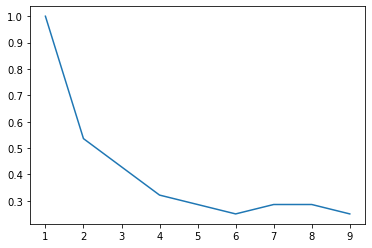

In [170]:
plt.plot(range(1,10),acc)

# 14) location_Brookefield

In [171]:
df14 = df[df['location_Brookefield']==1]

In [172]:
df14 = df14[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df14

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1349,2.0,3.000000,6900,1150.0,2,6000.000000,1,0,0,1
1350,2.0,2.000000,7000,1142.0,2,6129.597198,0,1,0,1
1351,4.0,2.000000,24000,2800.0,4,8571.428571,0,0,1,1
1352,3.0,2.000000,10500,1476.0,3,7113.821138,1,0,0,1
1353,4.0,1.000000,15200,1700.0,4,8941.176471,0,0,1,1
1354,2.0,1.000000,7500,1262.0,2,5942.947702,1,0,0,1
1355,2.0,2.000000,8000,1139.0,2,7023.705004,1,0,0,1
1356,2.0,2.000000,7000,1125.0,2,6222.222222,1,0,0,1
1357,3.0,2.000000,8500,1420.0,3,5985.915493,1,0,0,1
1358,2.0,2.000000,4800,941.0,2,5100.956429,1,0,0,1


In [173]:
df14.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.250655,0.811767,0.722111,0.934244,0.673646,-0.361747,-0.263719,0.774223,NaN
balcony,0.250655,1.000000,0.134600,0.259134,0.263510,-0.051062,-0.014843,0.010099,0.008851,NaN
price,0.811767,0.134600,1.000000,0.914523,0.868632,0.823569,-0.315884,-0.323346,0.778011,NaN
total_sqft_int,0.722111,0.259134,0.914523,1.000000,0.816685,0.547993,-0.229512,-0.256014,0.588372,NaN
bhk,0.934244,0.263510,0.868632,0.816685,1.000000,0.703691,-0.351937,-0.294724,0.795027,NaN
price_per_sqft,0.673646,-0.051062,0.823569,0.547993,0.703691,1.000000,-0.247110,-0.362022,0.728109,NaN
area_typeSuper built-up Area,-0.361747,-0.014843,-0.315884,-0.229512,-0.351937,-0.247110,1.000000,-0.680414,-0.596285,NaN
area_typeBuilt-up Area,-0.263719,0.010099,-0.323346,-0.256014,-0.294724,-0.362022,-0.680414,1.000000,-0.182574,NaN
area_typePlot Area,0.774223,0.008851,0.778011,0.588372,0.795027,0.728109,-0.596285,-0.182574,1.000000,NaN
availability_Ready To Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
x = df14[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df14[['price']]

In [175]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.5517241379310345]
k= 3 [1.0, 0.5517241379310345, 0.41379310344827586]
k= 4 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069]
k= 5 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724]
k= 6 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724, 0.2413793103448276]
k= 7 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724, 0.2413793103448276, 0.2413793103448276]
k= 8 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724, 0.2413793103448276, 0.2413793103448276, 0.20689655172413793]
k= 9 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724, 0.2413793103448276, 0.2413793103448276, 0.20689655172413793, 0.20689655172413793]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [176]:
max(acc)

1.0

In [177]:
k = acc.index(max(acc))+1
k

1

In [178]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


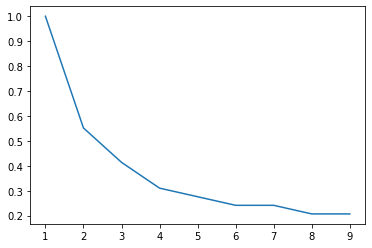

In [179]:
plt.plot(range(1,10),acc)

# 15) location_BTM 2nd Stage

In [180]:
df15 = df[df['location_BTM 2nd Stage']==1]
df15 = df15[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df15

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
654,2.0,1.000000,5200,950.0,2,5473.684211,0,0,0,1
655,3.0,1.584376,17000,1850.0,3,9189.189189,0,1,0,1
656,2.0,2.000000,8000,1200.0,2,6666.666667,1,0,0,1
657,2.0,2.000000,7000,1274.0,2,5494.505495,1,0,0,1
658,2.0,1.000000,4800,1070.0,2,4485.981308,1,0,0,1
659,2.0,2.000000,8000,1280.0,2,6250.000000,0,1,0,1
660,2.0,2.000000,7000,1100.0,2,6363.636364,0,1,0,1
661,2.0,2.000000,5800,1000.0,2,5800.000000,1,0,0,1
662,5.0,3.000000,41600,2990.0,5,13913.043478,0,0,1,1
663,2.0,2.000000,5500,1265.0,2,4347.826087,1,0,0,1


In [181]:
df15.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.289495,0.795756,0.850887,0.920775,0.704995,-0.255377,0.043797,0.439406,NaN
balcony,0.289495,1.000000,-0.031364,0.054413,0.227543,-0.061450,0.081930,0.168299,-0.165957,NaN
price,0.795756,-0.031364,1.000000,0.977069,0.883614,0.976243,-0.301043,-0.063031,0.686450,NaN
total_sqft_int,0.850887,0.054413,0.977069,1.000000,0.884930,0.931643,-0.244700,-0.034818,0.590589,NaN
bhk,0.920775,0.227543,0.883614,0.884930,1.000000,0.831544,-0.416025,0.047565,0.699913,NaN
price_per_sqft,0.704995,-0.061450,0.976243,0.931643,0.831544,1.000000,-0.368451,0.027706,0.665636,NaN
area_typeSuper built-up Area,-0.255377,0.081930,-0.301043,-0.244700,-0.416025,-0.368451,1.000000,-0.685994,-0.458831,NaN
area_typeBuilt-up Area,0.043797,0.168299,-0.063031,-0.034818,0.047565,0.027706,-0.685994,1.000000,-0.157378,NaN
area_typePlot Area,0.439406,-0.165957,0.686450,0.590589,0.699913,0.665636,-0.458831,-0.157378,1.000000,NaN
availability_Ready To Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
x = df15[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df15[['price']]

In [183]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.42857142857142855]
k= 3 [1.0, 0.42857142857142855, 0.38095238095238093]
k= 4 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808]
k= 5 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808]
k= 6 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047]
k= 7 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047, 0.19047619047619047]
k= 8 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047, 0.19047619047619047, 0.19047619047619047]
k= 9 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047, 0.19047619047619047, 0.19047619047619047, 0.14285714285714285]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [184]:
max(acc)

1.0

In [185]:
k = acc.index(max(acc))+1
k

1

In [186]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


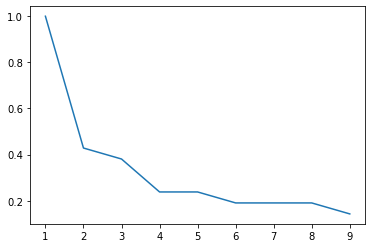

In [187]:
plt.plot(range(1,10),acc)

# 16) location_Budigere

In [188]:
df16 = df[df['location_Budigere']==1]
df16 = df16[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df16

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1378,2.0,2.0,5640,1153.0,2,4891.587164,1,0,0,1
1379,2.0,1.0,5990,1162.0,2,5154.905336,1,0,0,1
1380,4.0,2.0,10300,1991.0,3,5173.279759,1,0,0,1
1381,2.0,2.0,5700,1153.0,2,4943.625325,1,0,0,1
1382,2.0,1.0,5700,1162.0,2,4905.335628,1,0,0,1
1383,2.0,2.0,5680,1139.0,2,4986.830553,1,0,0,1
1384,2.0,2.0,5685,1139.0,2,4991.220369,1,0,0,1
1385,4.0,2.0,10000,1991.0,3,5022.601708,1,0,0,1
1386,1.0,1.0,3500,664.0,1,5271.084337,1,0,0,1
1387,3.0,2.0,9300,1820.0,3,5109.890110,1,0,0,1


In [189]:
df16.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.528193,0.963352,0.971755,0.943909,0.231324,0.092735,-0.092735,NaN,0.248700
balcony,0.528193,1.000000,0.539788,0.542046,0.577764,0.169057,0.073410,-0.073410,NaN,0.700219
price,0.963352,0.539788,1.000000,0.994914,0.966758,0.350810,0.025924,-0.025924,NaN,0.253996
total_sqft_int,0.971755,0.542046,0.994914,1.000000,0.966188,0.258178,0.047879,-0.047879,NaN,0.240106
bhk,0.943909,0.577764,0.966758,0.966188,1.000000,0.281049,0.083225,-0.083225,NaN,0.275683
price_per_sqft,0.231324,0.169057,0.350810,0.258178,0.281049,1.000000,-0.175183,0.175183,NaN,0.297200
area_typeSuper built-up Area,0.092735,0.073410,0.025924,0.047879,0.083225,-0.175183,1.000000,-1.000000,NaN,-0.057143
area_typeBuilt-up Area,-0.092735,-0.073410,-0.025924,-0.047879,-0.083225,0.175183,-1.000000,1.000000,NaN,0.057143
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,0.248700,0.700219,0.253996,0.240106,0.275683,0.297200,-0.057143,0.057143,NaN,1.000000


In [190]:
x = df16[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df16[['price']]

In [191]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.6486486486486487]
k= 3 [1.0, 0.6486486486486487, 0.5135135135135135]
k= 4 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865]
k= 5 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246]
k= 6 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246, 0.35135135135135137]
k= 7 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246, 0.35135135135135137, 0.2972972972972973]
k= 8 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246, 0.35135135135135137, 0.2972972972972973, 0.2972972972972973]
k= 9 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246, 0.35135135135135137, 0.2972972972972973, 0.2972972972972973, 0.24324324324324326]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [192]:
max(acc)

1.0

In [193]:
k = acc.index(max(acc))+1
k

1

In [194]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


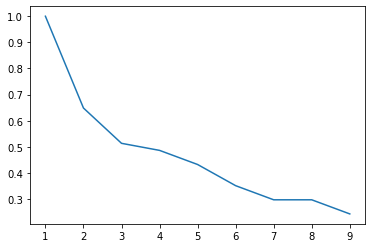

In [195]:
plt.plot(range(1,10),acc)

# 17) location_Chandapura

In [196]:
df17 = df[df['location_Chandapura']==1]
df17 = df17[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df17

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1476,1.0,1.0,1645,645.00,1,2550.387597,1,0,0,0
1477,1.0,1.0,1645,645.00,1,2550.387597,1,0,0,0
1478,2.0,2.0,3200,1200.00,2,2666.666667,1,0,0,1
1479,2.0,2.0,2768,1025.00,2,2700.487805,1,0,0,0
1480,1.0,0.0,1513,582.50,1,2598.283262,1,0,0,0
1481,2.0,1.0,3300,1065.00,3,3098.591549,1,0,0,1
1482,2.0,1.0,2540,850.00,2,2988.235294,1,0,0,0
1483,1.0,0.0,1357,590.00,1,2300.000000,1,0,0,0
1484,1.0,1.0,1645,645.00,1,2550.387597,1,0,0,0
1485,1.0,1.0,1404,520.00,1,2700.000000,1,0,0,0


In [197]:
df17.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.545852,0.829872,0.769119,0.826958,0.747471,-0.200692,0.206412,0.080933,0.389391
balcony,0.545852,1.000000,0.530545,0.561968,0.521671,0.291152,-0.014335,0.135797,-0.094422,0.389391
price,0.829872,0.530545,1.000000,0.973984,0.915749,0.728657,-0.421867,0.195310,0.367613,0.463730
total_sqft_int,0.769119,0.561968,0.973984,1.000000,0.876770,0.562979,-0.364988,0.105748,0.370389,0.420720
bhk,0.826958,0.521671,0.915749,0.876770,1.000000,0.727590,-0.258805,0.254556,0.113991,0.652145
price_per_sqft,0.747471,0.291152,0.728657,0.562979,0.727590,1.000000,-0.392963,0.349145,0.204012,0.408874
area_typeSuper built-up Area,-0.200692,-0.014335,-0.421867,-0.364988,-0.258805,-0.392963,1.000000,-0.606274,-0.752773,-0.076696
area_typeBuilt-up Area,0.206412,0.135797,0.195310,0.105748,0.254556,0.349145,-0.606274,1.000000,-0.067116,0.348743
area_typePlot Area,0.080933,-0.094422,0.367613,0.370389,0.113991,0.204012,-0.752773,-0.067116,1.000000,-0.192450
availability_Ready To Move,0.389391,0.389391,0.463730,0.420720,0.652145,0.408874,-0.076696,0.348743,-0.192450,1.000000


In [198]:
x = df17[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df17[['price']]

In [199]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.7435897435897436]
k= 3 [1.0, 0.7435897435897436, 0.6153846153846154]
k= 4 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898]
k= 5 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641]
k= 6 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641, 0.5384615384615384]
k= 7 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641, 0.5384615384615384, 0.5384615384615384]
k= 8 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641, 0.5384615384615384, 0.5384615384615384, 0.5128205128205128]
k= 9 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641, 0.5384615384615384, 0.5384615384615384, 0.5128205128205128, 0.4358974358974359]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [200]:
max(acc)

1.0

In [201]:
k = acc.index(max(acc))+1
k
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


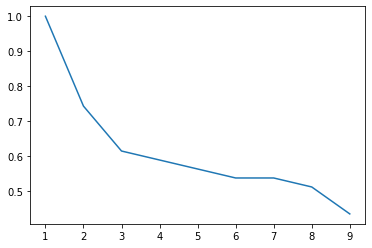

In [202]:
plt.plot(range(1,10),acc)

# 18) location_Channasandra

In [203]:
df18 = df[df['location_Channasandra']==1]
df18 = df18[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df18

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1520,2.0,1.0,3834,1009.0,2,3799.801784,1,0,0,0
1521,2.0,1.0,3500,1065.0,2,3286.384977,1,0,0,1
1522,2.0,1.0,9000,1470.0,3,6122.448980,1,0,0,1
1523,2.0,1.0,3345,1115.0,2,3000.000000,1,0,0,1
1524,2.0,1.0,3450,1030.0,2,3349.514563,1,0,0,1
1525,6.0,0.0,18000,4200.0,6,4285.714286,0,1,0,1
1526,2.0,1.0,4000,1115.0,2,3587.443946,1,0,0,1
1527,3.0,1.0,6777,1200.0,3,5647.500000,0,0,1,0
1528,2.0,1.0,3550,1104.0,2,3215.579710,1,0,0,1
1529,2.0,1.0,5500,1160.0,2,4741.379310,1,0,0,1


In [204]:
df18.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,-0.492859,0.915184,0.893100,0.935502,0.394723,-0.664573,0.554877,0.386732,-0.131153
balcony,-0.492859,1.000000,-0.473319,-0.482325,-0.409535,-0.156581,0.326038,-0.399227,-0.105060,-0.315179
price,0.915184,-0.473319,1.000000,0.926411,0.961273,0.538365,-0.564148,0.562424,0.267362,-0.066679
total_sqft_int,0.893100,-0.482325,0.926411,1.000000,0.894605,0.185142,-0.417564,0.595788,0.078225,0.080080
bhk,0.935502,-0.409535,0.961273,0.894605,1.000000,0.507977,-0.587918,0.511875,0.328125,-0.118125
price_per_sqft,0.394723,-0.156581,0.538365,0.185142,0.507977,1.000000,-0.581888,0.192679,0.534056,-0.378040
area_typeSuper built-up Area,-0.664573,0.326038,-0.564148,-0.417564,-0.587918,-0.581888,1.000000,-0.487950,-0.813250,0.370842
area_typeBuilt-up Area,0.554877,-0.399227,0.562424,0.595788,0.511875,0.192679,-0.487950,1.000000,-0.111111,0.200000
area_typePlot Area,0.386732,-0.105060,0.267362,0.078225,0.328125,0.534056,-0.813250,-0.111111,1.000000,-0.555556
availability_Ready To Move,-0.131153,-0.315179,-0.066679,0.080080,-0.118125,-0.378040,0.370842,0.200000,-0.555556,1.000000


In [205]:
x = df18[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df18[['price']]

In [206]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.59375]
k= 3 [1.0, 0.59375, 0.34375]
k= 4 [1.0, 0.59375, 0.34375, 0.25]
k= 5 [1.0, 0.59375, 0.34375, 0.25, 0.21875]
k= 6 [1.0, 0.59375, 0.34375, 0.25, 0.21875, 0.21875]
k= 7 [1.0, 0.59375, 0.34375, 0.25, 0.21875, 0.21875, 0.1875]
k= 8 [1.0, 0.59375, 0.34375, 0.25, 0.21875, 0.21875, 0.1875, 0.1875]
k= 9 [1.0, 0.59375, 0.34375, 0.25, 0.21875, 0.21875, 0.1875, 0.1875, 0.1875]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [207]:
max(acc)

1.0

In [208]:
k = acc.index(max(acc))+1
k

1

In [209]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


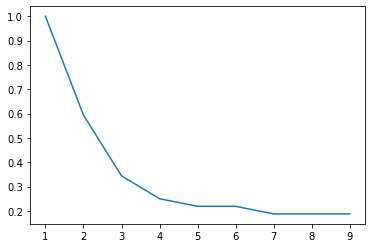

In [210]:
plt.plot(range(1,10),acc)

# 19) location_CV Raman Nagar

In [211]:
df19 = df[df['location_CV Raman Nagar']==1]
df19 = df19[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df19

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1429,2.0,2.0,5500,1120.0,2,4910.714286,1,0,0,1
1430,2.0,1.0,5500,1070.0,2,5140.186916,0,1,0,1
1431,2.0,1.0,3700,740.0,2,5000.000000,1,0,0,1
1432,2.0,1.0,4900,1028.0,2,4766.536965,0,1,0,1
1433,2.0,1.0,9800,1392.0,2,7040.229885,1,0,0,1
1434,2.0,2.0,4750,1070.0,2,4439.252336,1,0,0,1
1435,3.0,2.0,12600,1825.0,3,6904.109589,1,0,0,1
1436,2.0,2.0,5000,1025.0,2,4878.048780,1,0,0,1
1437,2.0,2.0,6000,1198.0,2,5008.347245,1,0,0,1
1438,2.0,2.0,8500,1560.0,2,5448.717949,1,0,0,1


In [212]:
df19.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.129958,0.618024,0.516899,0.414158,0.390162,0.097823,-0.097823,NaN,0.045455
balcony,0.129958,1.000000,0.228254,0.367380,0.480222,-0.061426,0.435064,-0.435064,NaN,0.202157
price,0.618024,0.228254,1.000000,0.897728,0.565399,0.705455,0.248709,-0.248709,NaN,-0.306500
total_sqft_int,0.516899,0.367380,0.897728,1.000000,0.719420,0.339703,0.098008,-0.098008,NaN,-0.164841
bhk,0.414158,0.480222,0.565399,0.719420,1.000000,0.025287,0.133697,-0.133697,NaN,0.062124
price_per_sqft,0.390162,-0.061426,0.705455,0.339703,0.025287,1.000000,0.368907,-0.368907,NaN,-0.370096
area_typeSuper built-up Area,0.097823,0.435064,0.248709,0.098008,0.133697,0.368907,1.000000,-1.000000,NaN,-0.097823
area_typeBuilt-up Area,-0.097823,-0.435064,-0.248709,-0.098008,-0.133697,-0.368907,-1.000000,1.000000,NaN,0.097823
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,0.045455,0.202157,-0.306500,-0.164841,0.062124,-0.370096,-0.097823,0.097823,NaN,1.000000


In [213]:
x = df19[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df19[['price']]

In [214]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.5652173913043478]
k= 3 [1.0, 0.5652173913043478, 0.4782608695652174]
k= 4 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173]
k= 5 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173]
k= 6 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173, 0.34782608695652173]
k= 7 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173, 0.34782608695652173, 0.2608695652173913]
k= 8 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173, 0.34782608695652173, 0.2608695652173913, 0.2608695652173913]
k= 9 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173, 0.34782608695652173, 0.2608695652173913, 0.2608695652173913, 0.17391304347826086]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [215]:
max(acc)

1.0

In [216]:
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


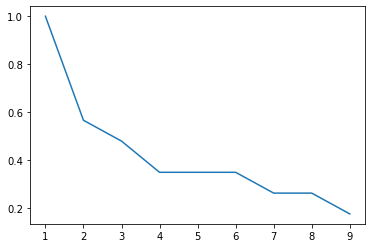

In [217]:
plt.plot(range(1,10),acc)

# 20) location_Devanahalli

In [218]:
df20 = df[df['location_Devanahalli']==1]
df20 = df20[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df20

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1709,2.0,2.0,6678,1260.0,2,5300.000000,1,0,0,0
1710,2.0,2.0,6852,1282.0,3,5344.773791,1,0,0,0
1711,2.0,1.0,6500,1360.0,2,4779.411765,1,0,0,0
1712,2.0,2.0,8500,1408.0,2,6036.931818,1,0,0,0
1713,2.0,1.0,5100,1010.0,2,5049.504950,1,0,0,1
1714,2.0,0.0,5335,1080.0,2,4939.814815,1,0,0,1
1715,5.0,3.0,10000,2400.0,5,4166.666667,0,0,1,1
1716,2.0,1.0,5900,1174.0,2,5025.553663,1,0,0,0
1717,1.0,1.0,3400,658.0,1,5167.173252,1,0,0,0
1718,1.0,0.0,2691,658.0,1,4089.665653,1,0,0,0


In [219]:
df20.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.577336,0.862191,0.926867,0.950316,0.141582,-0.518891,0.129772,0.680823,0.202585
balcony,0.577336,1.000000,0.482285,0.466069,0.596278,0.271444,-0.202414,-0.051043,0.406333,-0.025975
price,0.862191,0.482285,1.000000,0.955067,0.857785,0.448872,-0.467124,0.292503,0.369684,-0.016538
total_sqft_int,0.926867,0.466069,0.955067,1.000000,0.908322,0.182498,-0.538226,0.234654,0.567683,0.016245
bhk,0.950316,0.596278,0.857785,0.908322,1.000000,0.175440,-0.493111,0.123325,0.646997,0.192520
price_per_sqft,0.141582,0.271444,0.448872,0.182498,0.175440,1.000000,-0.032295,0.270762,-0.321297,0.054873
area_typeSuper built-up Area,-0.518891,-0.202414,-0.467124,-0.538226,-0.493111,-0.032295,1.000000,-0.798549,-0.552771,-0.274430
area_typeBuilt-up Area,0.129772,-0.051043,0.292503,0.234654,0.123325,0.270762,-0.798549,1.000000,-0.060193,0.113787
area_typePlot Area,0.680823,0.406333,0.369684,0.567683,0.646997,-0.321297,-0.552771,-0.060193,1.000000,0.297560
availability_Ready To Move,0.202585,-0.025975,-0.016538,0.016245,0.192520,0.054873,-0.274430,0.113787,0.297560,1.000000


In [220]:
x = df20[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df20[['price']]

In [221]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.52]
k= 3 [1.0, 0.52, 0.4]
k= 4 [1.0, 0.52, 0.4, 0.4]
k= 5 [1.0, 0.52, 0.4, 0.4, 0.32]
k= 6 [1.0, 0.52, 0.4, 0.4, 0.32, 0.28]
k= 7 [1.0, 0.52, 0.4, 0.4, 0.32, 0.28, 0.32]
k= 8 [1.0, 0.52, 0.4, 0.4, 0.32, 0.28, 0.32, 0.28]
k= 9 [1.0, 0.52, 0.4, 0.4, 0.32, 0.28, 0.32, 0.28, 0.28]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [222]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


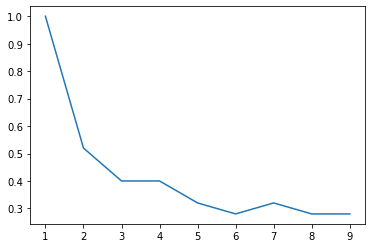

In [223]:
plt.plot(range(1,10),acc)

# 21) location_Dodda Nekkundi

In [224]:
df21 = df[df['location_Dodda Nekkundi']==1]
df21 = df21[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df21

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1756,2.0,2.000000,5500,1260.0,2,4365.079365,0,1,0,1
1757,2.0,3.000000,2800,850.0,2,3294.117647,1,0,0,1
1758,2.0,2.000000,6000,1390.0,2,4316.546763,1,0,0,1
1759,3.0,2.000000,12100,1804.0,3,6707.317073,1,0,0,1
1760,2.0,2.000000,5000,1080.0,2,4629.629630,1,0,0,1
1761,3.0,2.000000,13200,1999.0,3,6603.301651,1,0,0,1
1762,2.0,2.000000,4800,1100.0,2,4363.636364,1,0,0,1
1763,3.0,2.000000,13500,1999.0,3,6753.376688,1,0,0,1
1764,2.0,1.000000,4115,1100.0,2,3740.909091,1,0,0,1
1765,2.0,1.000000,7100,1252.0,3,5670.926518,1,0,0,1


In [225]:
df21.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.245124,0.933088,0.882702,0.776643,0.828277,0.190476,-0.190476,NaN,NaN
balcony,0.245124,1.000000,0.233307,0.210305,0.138280,0.198390,-0.038530,0.038530,NaN,NaN
price,0.933088,0.233307,1.000000,0.959668,0.868748,0.939091,0.182316,-0.182316,NaN,NaN
total_sqft_int,0.882702,0.210305,0.959668,1.000000,0.833313,0.821609,0.146609,-0.146609,NaN,NaN
bhk,0.776643,0.138280,0.868748,0.833313,1.000000,0.815176,0.245256,-0.245256,NaN,NaN
price_per_sqft,0.828277,0.198390,0.939091,0.821609,0.815176,1.000000,0.179206,-0.179206,NaN,NaN
area_typeSuper built-up Area,0.190476,-0.038530,0.182316,0.146609,0.245256,0.179206,1.000000,-1.000000,NaN,NaN
area_typeBuilt-up Area,-0.190476,0.038530,-0.182316,-0.146609,-0.245256,-0.179206,-1.000000,1.000000,NaN,NaN
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
x = df21[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df21[['price']]

In [227]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.52]
k= 3 [1.0, 0.52, 0.36]
k= 4 [1.0, 0.52, 0.36, 0.36]
k= 5 [1.0, 0.52, 0.36, 0.36, 0.28]
k= 6 [1.0, 0.52, 0.36, 0.36, 0.28, 0.28]
k= 7 [1.0, 0.52, 0.36, 0.36, 0.28, 0.28, 0.24]
k= 8 [1.0, 0.52, 0.36, 0.36, 0.28, 0.28, 0.24, 0.24]
k= 9 [1.0, 0.52, 0.36, 0.36, 0.28, 0.28, 0.24, 0.24, 0.24]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [228]:
max(acc)

1.0

In [229]:
k = acc.index(max(acc))+1
k

1

In [230]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


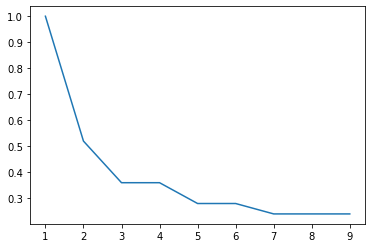

In [231]:
plt.plot(range(1,10),acc)

# 22) location_Doddathoguru

In [232]:
df22 = df[df['location_Doddathoguru']==1]
df22 = df22[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df22

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1823,2.0,0.0,3300,970.0,2,3402.061856,1,0,0,1
1824,2.0,1.0,3200,1050.0,2,3047.619048,0,1,0,1
1825,2.0,1.0,2500,850.0,2,2941.176471,1,0,0,1
1826,2.0,2.0,4200,1030.0,2,4077.669903,1,0,0,1
1827,3.0,2.0,6500,1549.0,3,4196.255649,1,0,0,1
1828,1.0,1.0,1700,550.0,1,3090.909091,1,0,0,1
1829,2.0,2.0,3350,1015.0,2,3300.492611,1,0,0,1
1830,2.0,2.0,3900,1104.0,2,3532.608696,1,0,0,1
1831,2.0,1.0,3200,915.0,2,3497.267760,1,0,0,1
1832,1.0,1.0,2550,750.0,1,3400.000000,1,0,0,1


In [233]:
df.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
bath,1.000000,0.283192,0.523941,0.653435,0.882461,0.350497,-0.118940,0.030143,0.161243,0.022495,...,-0.010388,-0.019047,-0.015385,0.002339,0.049603,0.011201,-0.020635,0.006606,-0.017608,-0.002474
balcony,0.283192,1.000000,0.138946,0.200648,0.269511,0.068018,0.120220,-0.048382,-0.138809,0.117337,...,0.027585,-0.015110,-0.018297,0.022038,0.024569,-0.020262,0.022541,0.000445,0.008764,-0.018788
price,0.523941,0.138946,1.000000,0.797955,0.497817,0.717821,-0.114594,-0.014613,0.229543,0.012542,...,-0.015052,-0.023918,-0.017011,0.019606,0.045600,0.000618,-0.021200,0.019573,-0.015800,-0.006216
total_sqft_int,0.653435,0.200648,0.797955,1.000000,0.647485,0.376673,-0.133719,0.014041,0.219383,0.009710,...,-0.012294,-0.021914,-0.016353,0.003619,0.037007,0.007224,-0.015287,0.007875,-0.011000,-0.010931
bhk,0.882461,0.269511,0.497817,0.647485,1.000000,0.323285,-0.142496,0.044187,0.178557,0.043887,...,-0.009725,-0.021754,-0.011599,-0.002366,0.043803,0.016102,-0.026186,0.005351,-0.010418,0.008504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Hosur Road,0.011201,-0.020262,0.000618,0.007224,0.016102,0.001412,0.001408,0.001151,-0.003231,-0.036076,...,-0.003028,-0.003028,-0.002958,-0.002958,-0.002958,1.000000,-0.002887,-0.002887,-0.002887,-0.002887
location_Horamavu Banaswadi,-0.020635,0.022541,-0.021200,-0.015287,-0.026186,-0.037227,0.024451,-0.018187,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,1.000000,-0.002817,-0.002817,-0.002817
location_Domlur,0.006606,0.000445,0.019573,0.007875,0.005351,0.054259,0.006048,0.002433,-0.013638,0.020595,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,1.000000,-0.002817,-0.002817
location_Mahadevpura,-0.017608,0.008764,-0.015800,-0.011000,-0.010418,-0.023633,0.030585,-0.025060,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,-0.002817,1.000000,-0.002817


In [234]:
x = df22[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df22[['price']]

In [235]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5454545454545454]
k= 3 [1.0, 0.5454545454545454, 0.4090909090909091]
k= 4 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182]
k= 5 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182]
k= 6 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182]
k= 7 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.2727272727272727]
k= 8 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.2727272727272727, 0.3181818181818182]
k= 9 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.2727272727272727, 0.3181818181818182, 0.3181818181818182]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [236]:
max(acc)

k = acc.index(max(acc))+1
k

knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


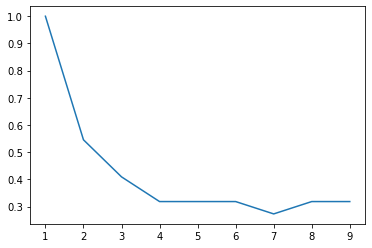

In [237]:
plt.plot(range(1,10),acc)

# 23) location_Domlur

In [238]:
df23 = df[df['location_Domlur']==1]
df23 = df23[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df23

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1861,3.0,2.000000,9000,1540.0,3,5844.155844,1,0,0,1
1862,2.0,2.000000,15000,1875.0,3,8000.000000,1,0,0,1
1863,3.0,3.000000,8600,1429.0,3,6018.194542,1,0,0,1
1864,1.0,0.000000,5500,640.0,1,8593.750000,0,1,0,1
1865,2.0,2.000000,8500,1050.0,2,8095.238095,1,0,0,1
1866,3.0,2.000000,15000,1800.0,3,8333.333333,1,0,0,1
1867,3.0,1.000000,13500,1720.0,3,7848.837209,1,0,0,1
1868,3.0,3.000000,16500,1950.0,3,8461.538462,1,0,0,1
1869,3.0,2.000000,28500,2180.0,3,13073.394495,0,1,0,0
1870,1.0,1.000000,7000,650.0,1,10769.230769,1,0,0,1


In [239]:
df23.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000e+00,0.406545,0.606678,0.797496,0.956722,-0.043232,-3.742561e-17,9.356403e-17,NaN,-0.154672
balcony,4.065446e-01,1.000000,0.234500,0.350070,0.443250,-0.119256,2.071287e-01,-2.071287e-01,NaN,-0.121469
price,6.066776e-01,0.234500,1.000000,0.825129,0.619033,0.648151,-1.665402e-01,1.665402e-01,NaN,-0.507221
total_sqft_int,7.974963e-01,0.350070,0.825129,1.000000,0.830930,0.124993,6.670128e-02,-6.670128e-02,NaN,-0.233389
bhk,9.567223e-01,0.443250,0.619033,0.830930,1.000000,-0.061372,3.378687e-02,-3.378687e-02,NaN,-0.139522
price_per_sqft,-4.323185e-02,-0.119256,0.648151,0.124993,-0.061372,1.000000,-3.603346e-01,3.603346e-01,NaN,-0.517079
area_typeSuper built-up Area,-3.742561e-17,0.207129,-0.166540,0.066701,0.033787,-0.360335,1.000000e+00,-1.000000e+00,NaN,0.458831
area_typeBuilt-up Area,9.356403e-17,-0.207129,0.166540,-0.066701,-0.033787,0.360335,-1.000000e+00,1.000000e+00,NaN,-0.458831
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-1.546721e-01,-0.121469,-0.507221,-0.233389,-0.139522,-0.517079,4.588315e-01,-4.588315e-01,NaN,1.000000


<AxesSubplot:ylabel='bath'>

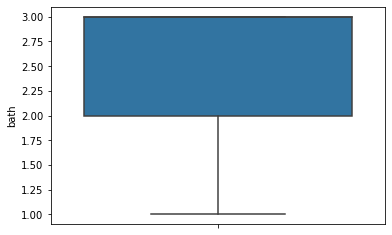

In [240]:
sns.boxplot(y='bath',data=df23)

<AxesSubplot:ylabel='price'>

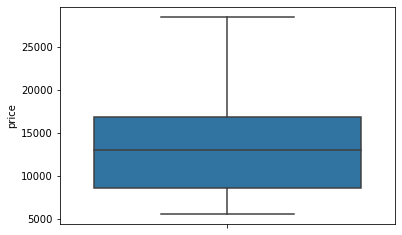

In [241]:
sns.boxplot(y='price',data=df23)

In [242]:
x = df23[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df23[['price']]

In [243]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6]
k= 3 [1.0, 0.6, 0.45]
k= 4 [1.0, 0.6, 0.45, 0.4]
k= 5 [1.0, 0.6, 0.45, 0.4, 0.3]
k= 6 [1.0, 0.6, 0.45, 0.4, 0.3, 0.25]
k= 7 [1.0, 0.6, 0.45, 0.4, 0.3, 0.25, 0.25]
k= 8 [1.0, 0.6, 0.45, 0.4, 0.3, 0.25, 0.25, 0.2]
k= 9 [1.0, 0.6, 0.45, 0.4, 0.3, 0.25, 0.25, 0.2, 0.2]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [244]:
max(acc)

k = acc.index(max(acc))+1
k

knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


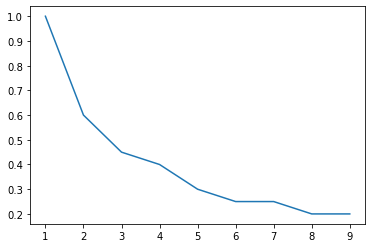

In [245]:
plt.plot(range(1,10),acc)

# 24) location_Electronic City

In [246]:
df24 = df[df['location_Electronic City']==1]
df24 = df24[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df24

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
1915,2.0,1.0,6450,1500.0,3,4300.000000,1,0,0,1
1916,2.0,1.0,6000,1060.0,2,5660.377358,0,1,0,1
1917,2.0,1.0,6450,1152.0,2,5598.958333,1,0,0,0
1918,1.0,1.0,3600,770.0,2,4675.324675,0,1,0,1
1919,2.0,1.0,5200,1070.0,2,4859.813084,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2068,2.0,1.0,6450,1500.0,3,4300.000000,1,0,0,1
2069,4.0,2.0,13400,2093.0,4,6402.293359,1,0,0,0
2070,2.0,1.0,7300,1355.0,2,5387.453875,1,0,0,0
2071,2.0,1.0,6498,1360.0,3,4778.676471,1,0,0,1


In [247]:
df24.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.535386,0.826247,0.872222,0.852589,0.397716,-0.013281,-0.035082,0.236931,-0.083970
balcony,0.535386,1.000000,0.499968,0.483623,0.456394,0.287172,0.103299,-0.069589,-0.171177,0.070524
price,0.826247,0.499968,1.000000,0.931980,0.833398,0.710027,0.000849,-0.042068,0.201151,-0.189045
total_sqft_int,0.872222,0.483623,0.931980,1.000000,0.902506,0.442207,0.017309,-0.057264,0.193923,-0.164902
bhk,0.852589,0.456394,0.833398,0.902506,1.000000,0.374944,-0.013132,-0.030323,0.212967,-0.025506
price_per_sqft,0.397716,0.287172,0.710027,0.442207,0.374944,1.000000,0.009972,-0.025913,0.077175,-0.173030
area_typeSuper built-up Area,-0.013281,0.103299,0.000849,0.017309,-0.013132,0.009972,1.000000,-0.979374,-0.164852,-0.140204
area_typeBuilt-up Area,-0.035082,-0.069589,-0.042068,-0.057264,-0.030323,-0.025913,-0.979374,1.000000,-0.037840,0.129425
area_typePlot Area,0.236931,-0.171177,0.201151,0.193923,0.212967,0.077175,-0.164852,-0.037840,1.000000,0.061611
availability_Ready To Move,-0.083970,0.070524,-0.189045,-0.164902,-0.025506,-0.173030,-0.140204,0.129425,0.061611,1.000000


In [248]:
x = df24[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df24[['price']]

In [249]:
acc = []
for i in range(1,12):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.6075949367088608]
k= 3 [1.0, 0.6075949367088608, 0.4177215189873418]
k= 4 [1.0, 0.6075949367088608, 0.4177215189873418, 0.33544303797468356]
k= 5 [1.0, 0.6075949367088608, 0.4177215189873418, 0.33544303797468356, 0.2974683544303797]
k= 6 [1.0, 0.6075949367088608, 0.4177215189873418, 0.33544303797468356, 0.2974683544303797, 0.2974683544303797]
k= 7 [1.0, 0.6075949367088608, 0.4177215189873418, 0.33544303797468356, 0.2974683544303797, 0.2974683544303797, 0.2848101265822785]
k= 8 [1.0, 0.6075949367088608, 0.4177215189873418, 0.33544303797468356, 0.2974683544303797, 0.2974683544303797, 0.2848101265822785, 0.26582278481012656]
k= 9 [1.0, 0.6075949367088608, 0.4177215189873418, 0.33544303797468356, 0.2974683544303797, 0.2974683544303797, 0.2848101265822785, 0.26582278481012656, 0.25949367088607594]
k= 10 [1.0, 0.6075949367088608, 0.4177215189873418, 0.33544303797468356, 0.2974683544303797, 0.2974683544303797, 0.2848101265822785, 0.26582278481012656, 0.2594936708860759

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [250]:
max(acc)

k = acc.index(max(acc))+1
k

knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


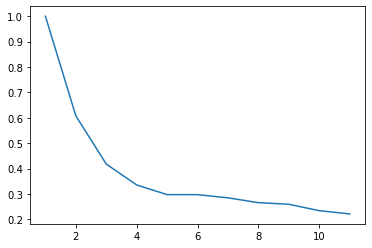

In [251]:
plt.plot(range(1,12),acc)

# 25) location_Electronic City Phase II

In [252]:
df25 = df[df['location_Electronic City Phase II']==1]
df25 = df25[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df25

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2073,2.0,1.0,3907,1056.0,2,3699.810606,1,0,0,0
2074,2.0,1.0,3060,1020.0,2,3000.000000,1,0,0,0
2075,2.0,2.0,4500,1069.0,2,4209.541628,1,0,0,1
2076,1.0,1.0,2835,630.0,1,4500.000000,1,0,0,0
2077,2.0,1.0,2500,1000.0,2,2500.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2157,2.0,1.0,3075,1065.0,2,2887.323944,0,1,0,0
2158,2.0,1.0,3306,1140.0,2,2900.000000,0,1,0,0
2159,2.0,1.0,2650,911.0,2,2908.891328,1,0,0,1
2160,2.0,1.0,3465,1200.0,2,2887.500000,0,1,0,0


In [253]:
df25.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.088334,0.724506,0.724185,0.891006,0.240088,-0.014031,-0.077135,0.415475,0.008584
balcony,0.088334,1.000000,0.149100,0.084133,0.217344,0.188785,0.019551,-0.031095,0.051974,0.388144
price,0.724506,0.149100,1.000000,0.921424,0.712903,0.543155,0.012000,-0.181980,0.773513,0.196934
total_sqft_int,0.724185,0.084133,0.921424,1.000000,0.676100,0.181110,-0.130485,-0.064593,0.892030,-0.066590
bhk,0.891006,0.217344,0.712903,0.676100,1.000000,0.315034,-0.002841,-0.074344,0.351484,0.037182
price_per_sqft,0.240088,0.188785,0.543155,0.181110,0.315034,1.000000,0.331286,-0.346978,0.061550,0.635486
area_typeSuper built-up Area,-0.014031,0.019551,0.012000,-0.130485,-0.002841,0.331286,1.000000,-0.976056,-0.138866,0.220553
area_typeBuilt-up Area,-0.077135,-0.031095,-0.181980,-0.064593,-0.074344,-0.346978,-0.976056,1.000000,-0.079872,-0.203589
area_typePlot Area,0.415475,0.051974,0.773513,0.892030,0.351484,0.061550,-0.138866,-0.079872,1.000000,-0.083814
availability_Ready To Move,0.008584,0.388144,0.196934,-0.066590,0.037182,0.635486,0.220553,-0.203589,-0.083814,1.000000


In [254]:
x = df25[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df25[['price']]

In [255]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.651685393258427]
k= 3 [1.0, 0.651685393258427, 0.5168539325842697]
k= 4 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215]
k= 5 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528]
k= 6 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528, 0.25842696629213485]
k= 7 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528, 0.25842696629213485, 0.24719101123595505]
k= 8 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528, 0.25842696629213485, 0.24719101123595505, 0.23595505617977527]
k= 9 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528, 0.25842696629213485, 0.24719101123595505, 0.23595505617977527, 0.2247191011235955]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [256]:
max(acc)

k = acc.index(max(acc))+1
k

knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


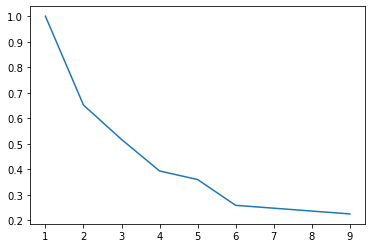

In [257]:
plt.plot(range(1,10),acc)

# 26) location_Electronics City Phase 1

In [258]:
df26 = df[df['location_Electronics City Phase 1']==1]
df26 = df26[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df26

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2163,3.0,2.0,7829,1475.00,3,5307.796610,1,0,0,1
2164,3.0,1.0,7880,1490.00,3,5288.590604,0,1,0,1
2165,2.0,2.0,5300,1113.27,2,4760.749863,1,0,0,1
2166,3.0,1.0,8400,1490.00,3,5637.583893,1,0,0,1
2167,2.0,1.0,5600,1015.00,2,5517.241379,0,1,0,1
2168,2.0,1.0,8091,1515.00,3,5340.594059,1,0,0,1
2169,2.0,0.0,4600,995.00,2,4623.115578,0,1,0,1
2170,2.0,1.0,8200,1555.00,3,5273.311897,1,0,0,1
2171,2.0,2.0,7500,1340.00,2,5597.014925,0,1,0,0
2172,2.0,2.0,5500,1124.00,3,4893.238434,1,0,0,1


In [259]:
df26.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.362033,0.822696,0.829542,0.891400,0.500009,0.093796,-0.093796,NaN,-0.086066
balcony,0.362033,1.000000,0.499989,0.497872,0.379064,0.375506,0.365983,-0.365983,NaN,-0.321975
price,0.822696,0.499989,1.000000,0.979633,0.872291,0.690272,0.253501,-0.253501,NaN,-0.177435
total_sqft_int,0.829542,0.497872,0.979633,1.000000,0.883287,0.543078,0.282157,-0.282157,NaN,-0.182136
bhk,0.891400,0.379064,0.872291,0.883287,1.000000,0.499809,0.171201,-0.171201,NaN,0.032880
price_per_sqft,0.500009,0.375506,0.690272,0.543078,0.499809,1.000000,0.063019,-0.063019,NaN,-0.179774
area_typeSuper built-up Area,0.093796,0.365983,0.253501,0.282157,0.171201,0.063019,1.000000,-1.000000,NaN,-0.330979
area_typeBuilt-up Area,-0.093796,-0.365983,-0.253501,-0.282157,-0.171201,-0.063019,-1.000000,1.000000,NaN,0.330979
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-0.086066,-0.321975,-0.177435,-0.182136,0.032880,-0.179774,-0.330979,0.330979,NaN,1.000000


In [260]:
x = df26[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df26[['price']]

In [261]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5714285714285714]
k= 3 [1.0, 0.5714285714285714, 0.40476190476190477]
k= 4 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477]
k= 5 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857]
k= 6 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857, 0.2857142857142857]
k= 7 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857, 0.2857142857142857, 0.21428571428571427]
k= 8 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857, 0.2857142857142857, 0.21428571428571427, 0.21428571428571427]
k= 9 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857, 0.2857142857142857, 0.21428571428571427, 0.21428571428571427, 0.21428571428571427]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [262]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


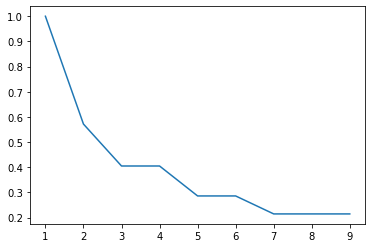

In [263]:
plt.plot(range(1,10),acc)

# 27) location_Frazer Town

In [264]:
df27 = df[df['location_Frazer Town']==1]
df27 = df27[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df27

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2208,3.0,1.000000,18000,1700.0,3,10588.235294,1,0,0,1
2209,3.0,1.584376,9545,1305.0,3,7314.176245,0,1,0,1
2210,3.0,3.000000,18500,1870.0,3,9893.048128,1,0,0,1
2211,3.0,2.000000,15000,1750.0,3,8571.428571,1,0,0,1
2212,3.0,1.000000,20000,2000.0,3,10000.000000,1,0,0,1
2213,4.0,2.000000,33000,3500.0,3,9428.571429,0,1,0,1
2214,4.0,3.000000,28500,2350.0,3,12127.659574,1,0,0,1
2215,2.0,2.000000,14000,1550.0,2,9032.258065,1,0,0,1
2216,4.0,2.000000,14500,1900.0,3,7631.578947,0,1,0,1
2217,3.0,2.000000,26500,2560.0,3,10351.562500,1,0,0,1


In [265]:
df27.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.401459,0.539559,0.505293,0.766824,0.037694,0.123775,0.063682,-0.454777,0.008917
balcony,0.401459,1.000000,0.154665,0.142514,0.337356,0.049299,0.304994,-0.126057,-0.447004,-0.299298
price,0.539559,0.154665,1.000000,0.918454,0.668949,0.381120,0.189243,-0.080356,-0.272263,0.016573
total_sqft_int,0.505293,0.142514,0.918454,1.000000,0.622877,0.017531,0.123177,-0.004156,-0.291828,0.046760
bhk,0.766824,0.337356,0.668949,0.622877,1.000000,0.063813,0.154997,0.079745,-0.569495,-0.023729
price_per_sqft,0.037694,0.049299,0.381120,0.017531,0.063813,1.000000,0.231822,-0.319590,0.192931,-0.106234
area_typeSuper built-up Area,0.123775,0.304994,0.189243,0.123177,0.154997,0.231822,1.000000,-0.914659,-0.272166,0.272166
area_typeBuilt-up Area,0.063682,-0.126057,-0.080356,-0.004156,0.079745,-0.319590,-0.914659,1.000000,-0.140028,-0.297560
area_typePlot Area,-0.454777,-0.447004,-0.272263,-0.291828,-0.569495,0.192931,-0.272166,-0.140028,1.000000,0.041667
availability_Ready To Move,0.008917,-0.299298,0.016573,0.046760,-0.023729,-0.106234,0.272166,-0.297560,0.041667,1.000000


In [266]:
x = df27[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df27[['price']]

In [267]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.56]
k= 3 [1.0, 0.56, 0.28]
k= 4 [1.0, 0.56, 0.28, 0.24]
k= 5 [1.0, 0.56, 0.28, 0.24, 0.2]
k= 6 [1.0, 0.56, 0.28, 0.24, 0.2, 0.24]
k= 7 [1.0, 0.56, 0.28, 0.24, 0.2, 0.24, 0.24]
k= 8 [1.0, 0.56, 0.28, 0.24, 0.2, 0.24, 0.24, 0.28]
k= 9 [1.0, 0.56, 0.28, 0.24, 0.2, 0.24, 0.24, 0.28, 0.28]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [268]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


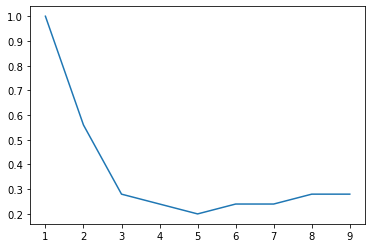

In [269]:
plt.plot(range(1,10),acc)

# 28) location_Gottigere

In [270]:
df28 = df[df['location_Gottigere']==1]
df28 = df28[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df28

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2306,2.0,2.0,4000,1100.0,2,3636.363636,0,1,0,1
2307,2.0,3.0,4500,967.0,2,4653.567735,0,1,0,1
2308,3.0,3.0,8250,1618.0,3,5098.887515,1,0,0,1
2309,2.0,1.0,6300,1222.0,2,5155.482815,1,0,0,1
2310,3.0,3.0,6500,1300.0,3,5000.000000,1,0,0,1
2311,2.0,1.0,3800,950.0,2,4000.000000,1,0,0,1
2312,2.0,1.0,4850,1153.0,2,4206.418040,1,0,0,1
2313,1.0,0.0,2600,812.0,1,3201.970443,0,0,1,1
2314,2.0,2.0,6500,1460.0,3,4452.054795,1,0,0,1
2315,3.0,2.0,7000,1500.0,3,4666.666667,1,0,0,1


In [271]:
df28.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.425283,0.737614,0.687929,0.857096,0.524692,0.204972,0.026198,-0.321224,NaN
balcony,0.425283,1.000000,0.122632,0.088603,0.342264,0.190865,0.358925,-0.212127,-0.269582,NaN
price,0.737614,0.122632,1.000000,0.953723,0.867256,0.600802,-0.128930,0.150158,0.012872,NaN
total_sqft_int,0.687929,0.088603,0.953723,1.000000,0.851189,0.341476,-0.164450,0.165330,0.046157,NaN
bhk,0.857096,0.342264,0.867256,0.851189,1.000000,0.484466,0.058737,0.073573,-0.167054,NaN
price_per_sqft,0.524692,0.190865,0.600802,0.341476,0.484466,1.000000,0.117847,0.079820,-0.258204,NaN
area_typeSuper built-up Area,0.204972,0.358925,-0.128930,-0.164450,0.058737,0.117847,1.000000,-0.715762,-0.609449,NaN
area_typeBuilt-up Area,0.026198,-0.212127,0.150158,0.165330,0.073573,0.079820,-0.715762,1.000000,-0.117444,NaN
area_typePlot Area,-0.321224,-0.269582,0.012872,0.046157,-0.167054,-0.258204,-0.609449,-0.117444,1.000000,NaN
availability_Ready To Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
x = df28[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df28[['price']]

In [273]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.6060606060606061]
k= 3 [1.0, 0.6060606060606061, 0.48484848484848486]
k= 4 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453]
k= 5 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939]
k= 6 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939, 0.3333333333333333]
k= 7 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939, 0.3333333333333333, 0.36363636363636365]
k= 8 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939, 0.3333333333333333, 0.36363636363636365, 0.36363636363636365]
k= 9 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939, 0.3333333333333333, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [274]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


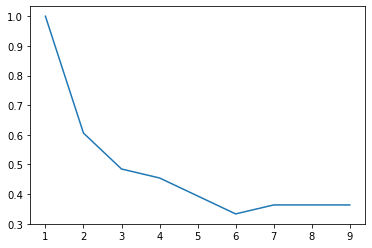

In [275]:
plt.plot(range(1,10),acc)

# 29) location_Green Glen Layout

In [276]:
df29 = df[df['location_Green Glen Layout']==1]
df29 = df29[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df29

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2346,3.0,2.000000,12000,1670.00,3,7185.628743,0,1,0,1
2347,4.0,3.000000,23000,3250.00,4,7076.923077,1,0,0,1
2348,3.0,2.000000,10500,1776.42,3,5910.764346,1,0,0,1
2349,4.0,1.584376,23000,3250.00,4,7076.923077,1,0,0,1
2350,2.0,1.000000,5680,940.00,2,6042.553191,0,1,0,1
2351,2.0,1.000000,6000,1075.00,2,5581.395349,0,1,0,1
2352,3.0,2.000000,11500,1715.00,3,6705.539359,1,0,0,1
2353,2.0,1.000000,11500,1751.00,3,6567.675614,1,0,0,1
2354,3.0,2.000000,13000,1750.00,3,7428.571429,1,0,0,1
2355,3.0,2.000000,10500,1530.00,3,6862.745098,1,0,0,1


In [277]:
df29.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.649814,0.743847,0.768948,0.818121,0.333326,0.464988,-0.464988,NaN,NaN
balcony,0.649814,1.000000,0.365401,0.357512,0.575118,0.333412,0.453104,-0.453104,NaN,NaN
price,0.743847,0.365401,1.000000,0.983644,0.918879,0.588548,0.417174,-0.417174,NaN,NaN
total_sqft_int,0.768948,0.357512,0.983644,1.000000,0.924762,0.439789,0.430439,-0.430439,NaN,NaN
bhk,0.818121,0.575118,0.918879,0.924762,1.000000,0.526865,0.604332,-0.604332,NaN,NaN
price_per_sqft,0.333326,0.333412,0.588548,0.439789,0.526865,1.000000,0.299555,-0.299555,NaN,NaN
area_typeSuper built-up Area,0.464988,0.453104,0.417174,0.430439,0.604332,0.299555,1.000000,-1.000000,NaN,NaN
area_typeBuilt-up Area,-0.464988,-0.453104,-0.417174,-0.430439,-0.604332,-0.299555,-1.000000,1.000000,NaN,NaN
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
x = df29[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df29[['price']]

In [279]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.8571428571428571]
k= 3 [1.0, 0.8571428571428571, 0.6785714285714286]
k= 4 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571]
k= 5 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571]
k= 6 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571, 0.5]
k= 7 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571, 0.5, 0.42857142857142855]
k= 8 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571, 0.5, 0.42857142857142855, 0.39285714285714285]
k= 9 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571, 0.5, 0.42857142857142855, 0.39285714285714285, 0.35714285714285715]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [280]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


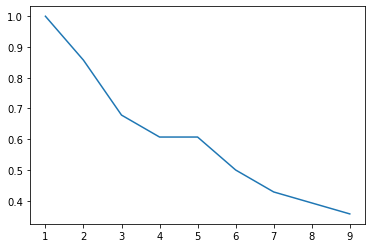

In [281]:
plt.plot(range(1,10),acc)

# 30) location_Haralur Road

In [282]:
df30=df[df['location_Haralur Road']==1]
df30 = df30[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df30


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2498,2.0,1.0,7000,1240.0,2,5645.161290,1,0,0,0
2499,2.0,2.0,4400,1027.0,2,4284.323272,1,0,0,1
2500,5.0,3.0,15400,2805.0,4,5490.196078,1,0,0,0
2501,2.0,2.0,4700,1194.0,2,3936.348409,1,0,0,1
2502,2.0,1.0,5300,1202.0,2,4409.317804,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2609,3.0,2.0,9700,1735.0,3,5590.778098,1,0,0,1
2610,3.0,2.0,9783,1810.0,3,5404.972376,1,0,0,0
2611,2.0,2.0,4600,1200.0,2,3833.333333,1,0,0,1
2612,2.0,2.0,4600,1243.0,2,3700.724055,1,0,0,1


In [283]:
df30.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.369938,0.836961,0.923173,0.885342,0.354154,-0.022594,0.022594,NaN,-0.328579
balcony,0.369938,1.000000,0.208015,0.395445,0.365885,-0.239296,0.081113,-0.081113,NaN,-0.024509
price,0.836961,0.208015,1.000000,0.920286,0.897708,0.734055,-0.008318,0.008318,NaN,-0.495647
total_sqft_int,0.923173,0.395445,0.920286,1.000000,0.929400,0.417611,-0.007102,0.007102,NaN,-0.362655
bhk,0.885342,0.365885,0.897708,0.929400,1.000000,0.473300,-0.007565,0.007565,NaN,-0.408549
price_per_sqft,0.354154,-0.239296,0.734055,0.417611,0.473300,1.000000,-0.059857,0.059857,NaN,-0.530156
area_typeSuper built-up Area,-0.022594,0.081113,-0.008318,-0.007102,-0.007565,-0.059857,1.000000,-1.000000,NaN,-0.171293
area_typeBuilt-up Area,0.022594,-0.081113,0.008318,0.007102,0.007565,0.059857,-1.000000,1.000000,NaN,0.171293
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-0.328579,-0.024509,-0.495647,-0.362655,-0.408549,-0.530156,-0.171293,0.171293,NaN,1.000000


In [284]:
x = df30[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df30[['price']]

In [285]:
acc = []
for i in range(1,12):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.7758620689655172]
k= 3 [1.0, 0.7758620689655172, 0.7068965517241379]
k= 4 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759]
k= 5 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069]
k= 6 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517]
k= 7 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517, 0.5775862068965517]
k= 8 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517, 0.5775862068965517, 0.5689655172413793]
k= 9 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517, 0.5775862068965517, 0.5689655172413793, 0.5689655172413793]
k= 10 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517, 0.5775862068965517, 0.5689655172413793, 0.5689655172413793, 0.5431034482758

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [286]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


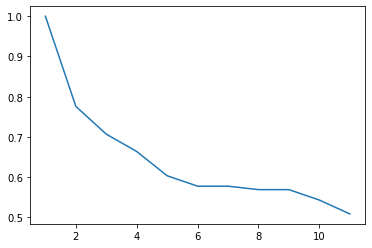

In [287]:
plt.plot(range(1,12),acc)

# 31) location_Harlur

In [288]:
df31 = df[df['location_Harlur']==1]
df31 = df31[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df31

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2616,2.0,1.0,6900,1174.00,2,5877.342419,1,0,0,1
2617,2.0,1.0,8400,1197.00,2,7017.543860,0,1,0,1
2618,3.0,2.0,13200,1757.00,3,7512.805919,1,0,0,1
2619,2.0,1.0,7600,1174.00,2,6473.594549,1,0,0,1
2620,3.0,2.0,12500,1754.00,3,7126.567845,1,0,0,1
2621,2.0,1.0,8500,1290.00,2,6589.147287,1,0,0,1
2622,3.0,2.0,11600,1752.12,3,6620.551104,1,0,0,1
2623,3.0,2.0,12400,1754.00,3,7069.555302,1,0,0,1
2624,2.0,2.0,6900,1152.00,2,5989.583333,1,0,0,1
2625,2.0,1.0,8700,1290.00,2,6744.186047,1,0,0,1


In [289]:
df31.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.685894,0.927404,0.944521,0.978117,0.606193,0.205820,-0.205820,NaN,-0.205820
balcony,0.685894,1.000000,0.556571,0.562505,0.667188,0.446517,0.045941,-0.045941,NaN,-0.265044
price,0.927404,0.556571,1.000000,0.984390,0.950241,0.738339,0.153196,-0.153196,NaN,-0.101095
total_sqft_int,0.944521,0.562505,0.984390,1.000000,0.955125,0.613509,0.175198,-0.175198,NaN,-0.152193
bhk,0.978117,0.667188,0.950241,0.955125,1.000000,0.663210,0.221282,-0.221282,NaN,-0.087810
price_per_sqft,0.606193,0.446517,0.738339,0.613509,0.663210,1.000000,-0.000205,0.000205,NaN,0.102563
area_typeSuper built-up Area,0.205820,0.045941,0.153196,0.175198,0.221282,-0.000205,1.000000,-1.000000,NaN,-0.073171
area_typeBuilt-up Area,-0.205820,-0.045941,-0.153196,-0.175198,-0.221282,0.000205,-1.000000,1.000000,NaN,0.073171
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-0.205820,-0.265044,-0.101095,-0.152193,-0.087810,0.102563,-0.073171,0.073171,NaN,1.000000


In [290]:
x = df31[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df31[['price']]

In [291]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.6363636363636364]
k= 3 [1.0, 0.6363636363636364, 0.5]
k= 4 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909]
k= 5 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365]
k= 6 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365, 0.3181818181818182]
k= 7 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365, 0.3181818181818182, 0.3409090909090909]
k= 8 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365, 0.3181818181818182, 0.3409090909090909, 0.25]
k= 9 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365, 0.3181818181818182, 0.3409090909090909, 0.25, 0.22727272727272727]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [292]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


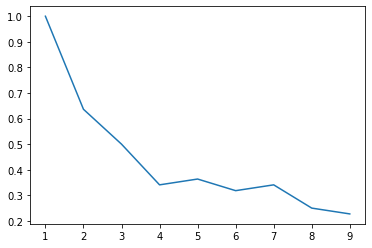

In [293]:
plt.plot(range(1,10),acc)

# 32) location_Hebbal

In [294]:
df32 = df[df['location_Hebbal']==1]
df32 = df32[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df32

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2662,2.0,2.0,12300,1760.0,3,6988.636364,1,0,0,1
2663,4.0,0.0,47700,5611.5,4,8500.400962,1,0,0,0
2664,2.0,1.0,9820,1349.0,2,7279.466271,1,0,0,1
2665,5.0,2.0,21200,2483.0,4,8538.058800,1,0,0,1
2666,2.0,2.0,13000,1760.0,3,7386.363636,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2744,2.0,1.0,11500,1294.0,2,8887.171561,1,0,0,1
2745,2.0,1.0,13700,1740.0,3,7873.563218,1,0,0,1
2746,3.0,2.0,15500,1662.0,3,9326.113117,1,0,0,0
2747,2.0,1.0,9800,1349.0,2,7264.640474,1,0,0,1


In [295]:
df32.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.599450,0.760366,0.787326,0.896547,0.385328,0.234663,-0.212907,NaN,-0.176273
balcony,0.599450,1.000000,0.363121,0.419056,0.592700,0.101325,0.184493,-0.156229,NaN,-0.269301
price,0.760366,0.363121,1.000000,0.984429,0.773124,0.577744,0.241171,-0.199216,NaN,-0.144115
total_sqft_int,0.787326,0.419056,0.984429,1.000000,0.800983,0.451686,0.244281,-0.201651,NaN,-0.201730
bhk,0.896547,0.592700,0.773124,0.800983,1.000000,0.408411,0.296110,-0.268657,NaN,-0.304454
price_per_sqft,0.385328,0.101325,0.577744,0.451686,0.408411,1.000000,0.241838,-0.187098,NaN,0.152105
area_typeSuper built-up Area,0.234663,0.184493,0.241171,0.244281,0.296110,0.241838,1.000000,-0.907288,NaN,-0.168675
area_typeBuilt-up Area,-0.212907,-0.156229,-0.199216,-0.201651,-0.268657,-0.187098,-0.907288,1.000000,NaN,0.221314
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-0.176273,-0.269301,-0.144115,-0.201730,-0.304454,0.152105,-0.168675,0.221314,NaN,1.000000


In [296]:
x = df32[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df32[['price']]
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.632183908045977]
k= 3 [1.0, 0.632183908045977, 0.4827586206896552]
k= 4 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906]
k= 5 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023]
k= 6 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023, 0.3333333333333333]
k= 7 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023, 0.3333333333333333, 0.3218390804597701]
k= 8 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023, 0.3333333333333333, 0.3218390804597701, 0.3103448275862069]
k= 9 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023, 0.3333333333333333, 0.3218390804597701, 0.3103448275862069, 0.28735632183908044]


In [297]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


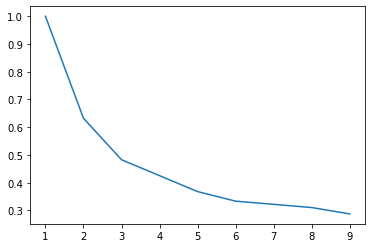

In [298]:
plt.plot(range(1,10),acc)

# 33) location_Hebbal Kempapura

In [299]:
df33 = df[df['location_Hebbal Kempapura']==1]
df33 = df33[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df33

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2749,3.0,2.000000,15500,1700.0,3,9117.647059,1,0,0,1
2750,3.0,2.000000,17500,1800.0,3,9722.222222,1,0,0,1
2751,4.0,1.584376,30000,2900.0,3,10344.827586,1,0,0,1
2752,3.0,2.000000,38000,3522.0,3,10789.324248,1,0,0,1
2753,5.0,1.584376,20000,2280.0,5,8771.929825,0,0,1,1
2754,2.0,1.000000,12500,1200.0,2,10416.666667,0,0,1,1
2755,4.0,1.584376,24000,2900.0,3,8275.862069,1,0,0,1
2756,2.0,2.000000,10200,1300.0,2,7846.153846,0,1,0,1
2757,2.0,3.000000,14000,1466.0,3,9549.795362,1,0,0,1
2758,2.0,1.000000,16500,1725.0,3,9565.217391,0,1,0,1


In [300]:
df33.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,-0.150915,0.477535,0.573580,0.864101,-0.153100,-0.129259,-0.111249,0.283565,NaN
balcony,-0.150915,1.000000,-0.019918,0.007944,-0.179789,-0.099589,0.512483,-0.376487,-0.237500,NaN
price,0.477535,-0.019918,1.000000,0.944791,0.395516,0.289830,0.225436,-0.082123,-0.195031,NaN
total_sqft_int,0.573580,0.007944,0.944791,1.000000,0.481066,-0.016050,0.100527,0.073227,-0.206115,NaN
bhk,0.864101,-0.179789,0.395516,0.481066,1.000000,-0.121474,-0.294018,0.035960,0.331532,NaN
price_per_sqft,-0.153100,-0.099589,0.289830,-0.016050,-0.121474,1.000000,0.279963,-0.435210,0.119228,NaN
area_typeSuper built-up Area,-0.129259,0.512483,0.225436,0.100527,-0.294018,0.279963,1.000000,-0.645497,-0.560112,NaN
area_typeBuilt-up Area,-0.111249,-0.376487,-0.082123,0.073227,0.035960,-0.435210,-0.645497,1.000000,-0.271163,NaN
area_typePlot Area,0.283565,-0.237500,-0.195031,-0.206115,0.331532,0.119228,-0.560112,-0.271163,1.000000,NaN
availability_Ready To Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
x = df33[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df33[['price']]
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6666666666666666]
k= 3 [1.0, 0.6666666666666666, 0.47619047619047616]
k= 4 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616]
k= 5 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855]
k= 6 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.3333333333333333]
k= 7 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.3333333333333333, 0.2857142857142857]
k= 8 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808]
k= 9 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808, 0.23809523809523808]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [302]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


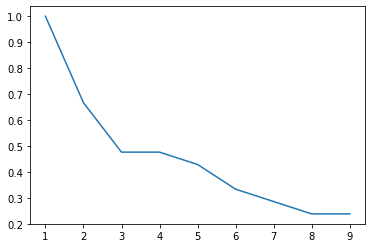

In [303]:
plt.plot(range(1,10),acc)

# 34) location_Hegde Nagar

In [304]:
df34 = df[df['location_Hegde Nagar']==1]
df34 = df34[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df34

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2770,3.0,1.000000,10100,1569.00,3,6437.221160,1,0,0,1
2771,7.0,2.000000,21000,3000.00,6,7000.000000,0,1,0,1
2772,3.0,2.000000,13200,2026.00,3,6515.301086,1,0,0,1
2773,3.0,2.000000,11500,1801.00,3,6385.341477,1,0,0,1
2774,1.0,1.584376,5600,1050.00,2,5333.333333,0,0,1,1
2775,2.0,1.000000,9700,1341.00,2,7233.407905,1,0,0,1
2776,4.0,2.000000,14500,2112.95,3,6862.443503,1,0,0,1
2777,3.0,2.000000,11300,1703.00,3,6635.349383,1,0,0,1
2778,3.0,1.000000,10500,1570.00,3,6687.898089,1,0,0,1
2779,3.0,2.000000,14000,1801.00,3,7773.459189,1,0,0,1


In [305]:
df34.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.435573,0.893134,0.928715,0.839586,0.309256,0.145823,0.336244,-0.460953,0.037780
balcony,0.435573,1.000000,0.586315,0.630535,0.389250,0.145457,0.417550,0.139586,-0.636632,-0.139586
price,0.893134,0.586315,1.000000,0.941148,0.777787,0.587505,0.271278,0.242849,-0.539906,-0.049458
total_sqft_int,0.928715,0.630535,0.941148,1.000000,0.795039,0.289300,0.256573,0.275741,-0.548865,-0.092433
bhk,0.839586,0.389250,0.777787,0.795039,1.000000,0.260097,-0.039491,0.611236,-0.458067,-0.023737
price_per_sqft,0.309256,0.145457,0.587505,0.289300,0.260097,1.000000,0.260828,-0.051830,-0.282291,0.016408
area_typeSuper built-up Area,0.145823,0.417550,0.271278,0.256573,-0.039491,0.260828,1.000000,-0.601074,-0.748331,-0.107335
area_typeBuilt-up Area,0.336244,0.139586,0.242849,0.275741,0.611236,-0.051830,-0.601074,1.000000,-0.080322,0.064516
area_typePlot Area,-0.460953,-0.636632,-0.539906,-0.548865,-0.458067,-0.282291,-0.748331,-0.080322,1.000000,0.080322
availability_Ready To Move,0.037780,-0.139586,-0.049458,-0.092433,-0.023737,0.016408,-0.107335,0.064516,0.080322,1.000000


In [306]:
x = df34[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df34[['price']]
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.5757575757575758]
k= 3 [1.0, 0.5757575757575758, 0.3939393939393939]
k= 4 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304]
k= 5 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243]
k= 6 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213]
k= 7 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213]
k= 8 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213, 0.24242424242424243]
k= 9 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213, 0.24242424242424243, 0.2727272727272727]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [307]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


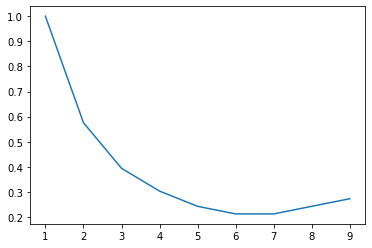

In [308]:
plt.plot(range(1,10),acc)

# 35) location_Hennur

In [309]:
df35 = df[df['location_Hennur']==1]
df35 = df35[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df35

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2805,2.0,1.000000,5200,1075.0,2,4837.209302,1,0,0,1
2806,2.0,1.000000,5232,1255.0,2,4168.924303,1,0,0,1
2807,2.0,1.000000,5700,1225.0,2,4653.061224,1,0,0,1
2808,2.0,1.000000,5750,1255.0,2,4581.673307,1,0,0,1
2809,2.0,2.000000,5700,1259.0,2,4527.402701,1,0,0,1
2810,2.0,2.000000,5350,1255.0,2,4262.948207,1,0,0,1
2811,2.0,1.000000,6000,1285.0,2,4669.260700,1,0,0,1
2812,2.0,1.000000,6000,1285.0,2,4669.260700,1,0,0,1
2813,2.0,1.000000,6000,1100.0,2,5454.545455,0,1,0,1
2814,2.0,1.000000,5800,1255.0,2,4621.513944,1,0,0,1


In [310]:
df35.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.154461,0.837018,0.880139,0.957712,0.396442,-0.378161,0.378161,NaN,-0.257561
balcony,0.154461,1.000000,0.083650,0.113708,0.120646,-0.131219,-0.116757,0.116757,NaN,0.417908
price,0.837018,0.083650,1.000000,0.971668,0.833571,0.671824,-0.210093,0.210093,NaN,-0.200553
total_sqft_int,0.880139,0.113708,0.971668,1.000000,0.859175,0.486920,-0.216496,0.216496,NaN,-0.264780
bhk,0.957712,0.120646,0.833571,0.859175,1.000000,0.454985,-0.351474,0.351474,NaN,-0.242563
price_per_sqft,0.396442,-0.131219,0.671824,0.486920,0.454985,1.000000,-0.145848,0.145848,NaN,-0.018036
area_typeSuper built-up Area,-0.378161,-0.116757,-0.210093,-0.216496,-0.351474,-0.145848,1.000000,-1.000000,NaN,-0.054841
area_typeBuilt-up Area,0.378161,0.116757,0.210093,0.216496,0.351474,0.145848,-1.000000,1.000000,NaN,0.054841
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,-0.257561,0.417908,-0.200553,-0.264780,-0.242563,-0.018036,-0.054841,0.054841,NaN,1.000000


In [311]:
x = df35[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df35[['price']]
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.6666666666666666]
k= 3 [1.0, 0.6666666666666666, 0.48717948717948717]
k= 4 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464]
k= 5 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359]
k= 6 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359, 0.2564102564102564]
k= 7 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359, 0.2564102564102564, 0.23076923076923078]
k= 8 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359, 0.2564102564102564, 0.23076923076923078, 0.1794871794871795]
k= 9 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359, 0.2564102564102564, 0.23076923076923078, 0.1794871794871795, 0.20512820512820512]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [312]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


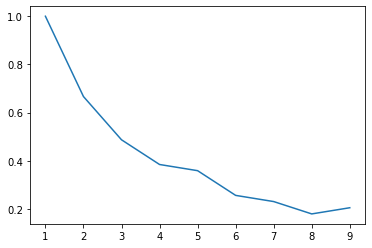

In [313]:
plt.plot(range(1,10),acc)

# 36) location_Hennur Road

In [314]:
df36 = df[df['location_Hennur Road']==1]
df36 = df36[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df36

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2851,3.0,2.000000,14000,2089.0,3,6701.771182,1,0,0,1
2852,8.0,1.584376,25000,5000.0,8,5000.000000,0,1,0,1
2853,2.0,1.000000,8309,1385.0,2,5999.277978,1,0,0,1
2854,2.0,0.000000,6377,1317.5,2,4840.227704,1,0,0,0
2855,3.0,1.000000,15900,2264.0,3,7022.968198,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2954,3.0,1.000000,11000,1891.0,3,5817.028027,1,0,0,1
2955,2.0,1.000000,5200,1165.0,2,4463.519313,1,0,0,0
2956,2.0,2.000000,8000,1450.0,2,5517.241379,0,1,0,1
2957,2.0,1.000000,6918,1155.0,2,5989.610390,1,0,0,1


In [315]:
df36.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.292195,0.848369,0.930011,0.915053,0.275200,-0.245443,0.136613,0.407129,0.237827
balcony,0.292195,1.000000,0.373604,0.359534,0.248781,0.178532,0.085259,-0.156791,0.242019,0.221164
price,0.848369,0.373604,1.000000,0.949488,0.786806,0.596921,-0.252930,0.091749,0.591499,0.205474
total_sqft_int,0.930011,0.359534,0.949488,1.000000,0.870827,0.355233,-0.262515,0.112083,0.554798,0.249970
bhk,0.915053,0.248781,0.786806,0.870827,1.000000,0.304511,-0.252287,0.174468,0.299081,0.205041
price_per_sqft,0.275200,0.178532,0.596921,0.355233,0.304511,1.000000,-0.100370,0.064246,0.137100,-0.059569
area_typeSuper built-up Area,-0.245443,0.085259,-0.252930,-0.262515,-0.252287,-0.100370,1.000000,-0.960939,-0.240715,-0.120669
area_typeBuilt-up Area,0.136613,-0.156791,0.091749,0.112083,0.174468,0.064246,-0.960939,1.000000,-0.037309,0.104338
area_typePlot Area,0.407129,0.242019,0.591499,0.554798,0.299081,0.137100,-0.240715,-0.037309,1.000000,0.069788
availability_Ready To Move,0.237827,0.221164,0.205474,0.249970,0.205041,-0.059569,-0.120669,0.104338,0.069788,1.000000


In [316]:
x = df36[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df36[['price']]
acc = []
for i in range(1,12):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.5462962962962963]
k= 3 [1.0, 0.5462962962962963, 0.35185185185185186]
k= 4 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703]
k= 5 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073]
k= 6 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297]
k= 7 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297, 0.19444444444444445]
k= 8 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297, 0.19444444444444445, 0.18518518518518517]
k= 9 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297, 0.19444444444444445, 0.18518518518518517, 0.19444444444444445]
k= 10 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297, 0.19444444444444445, 0.18518518518518

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [317]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


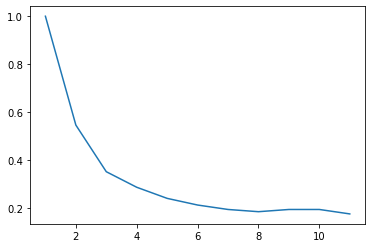

In [318]:
plt.plot(range(1,12),acc)

# 37) location_Hoodi

In [319]:
df37 = df[df['location_Hoodi']==1]
df37 = df37[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df37

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
2973,2.0,2.0,6700,985.0,2,6802.030457,0,1,0,1
2974,2.0,2.0,8000,1425.0,2,5614.035088,0,1,0,1
2975,2.0,2.0,7500,1420.0,2,5281.690141,1,0,0,1
2976,3.0,2.0,11000,1639.0,3,6711.409396,1,0,0,0
2977,3.0,1.0,9832,1639.0,3,5998.779744,1,0,0,0
2978,2.0,1.0,6087,1026.0,2,5932.748538,1,0,0,0
2979,2.0,2.0,5000,1050.0,2,4761.904762,1,0,0,1
2980,2.0,1.0,7800,1400.0,2,5571.428571,1,0,0,1
2981,5.0,2.0,16000,2400.0,5,6666.666667,0,0,1,1
2982,2.0,0.0,7173,1196.0,2,5998.327759,1,0,0,0


In [320]:
df.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
bath,1.000000,0.283192,0.523941,0.653435,0.882461,0.350497,-0.118940,0.030143,0.161243,0.022495,...,-0.010388,-0.019047,-0.015385,0.002339,0.049603,0.011201,-0.020635,0.006606,-0.017608,-0.002474
balcony,0.283192,1.000000,0.138946,0.200648,0.269511,0.068018,0.120220,-0.048382,-0.138809,0.117337,...,0.027585,-0.015110,-0.018297,0.022038,0.024569,-0.020262,0.022541,0.000445,0.008764,-0.018788
price,0.523941,0.138946,1.000000,0.797955,0.497817,0.717821,-0.114594,-0.014613,0.229543,0.012542,...,-0.015052,-0.023918,-0.017011,0.019606,0.045600,0.000618,-0.021200,0.019573,-0.015800,-0.006216
total_sqft_int,0.653435,0.200648,0.797955,1.000000,0.647485,0.376673,-0.133719,0.014041,0.219383,0.009710,...,-0.012294,-0.021914,-0.016353,0.003619,0.037007,0.007224,-0.015287,0.007875,-0.011000,-0.010931
bhk,0.882461,0.269511,0.497817,0.647485,1.000000,0.323285,-0.142496,0.044187,0.178557,0.043887,...,-0.009725,-0.021754,-0.011599,-0.002366,0.043803,0.016102,-0.026186,0.005351,-0.010418,0.008504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Hosur Road,0.011201,-0.020262,0.000618,0.007224,0.016102,0.001412,0.001408,0.001151,-0.003231,-0.036076,...,-0.003028,-0.003028,-0.002958,-0.002958,-0.002958,1.000000,-0.002887,-0.002887,-0.002887,-0.002887
location_Horamavu Banaswadi,-0.020635,0.022541,-0.021200,-0.015287,-0.026186,-0.037227,0.024451,-0.018187,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,1.000000,-0.002817,-0.002817,-0.002817
location_Domlur,0.006606,0.000445,0.019573,0.007875,0.005351,0.054259,0.006048,0.002433,-0.013638,0.020595,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,1.000000,-0.002817,-0.002817
location_Mahadevpura,-0.017608,0.008764,-0.015800,-0.011000,-0.010418,-0.023633,0.030585,-0.025060,-0.013638,0.027142,...,-0.002955,-0.002955,-0.002887,-0.002887,-0.002887,-0.002887,-0.002817,-0.002817,1.000000,-0.002817


In [321]:
x = df37[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df37[['price']]
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5135135135135135]
k= 3 [1.0, 0.5135135135135135, 0.2702702702702703]
k= 4 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892]
k= 5 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623]
k= 6 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623, 0.1891891891891892]
k= 7 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623, 0.1891891891891892, 0.16216216216216217]
k= 8 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623, 0.1891891891891892, 0.16216216216216217, 0.16216216216216217]
k= 9 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623, 0.1891891891891892, 0.16216216216216217, 0.16216216216216217, 0.16216216216216217]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [322]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


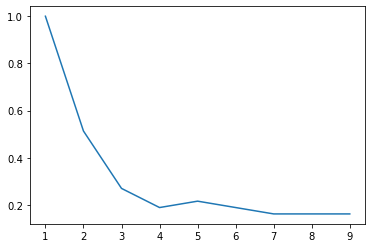

In [323]:
plt.plot(range(1,10),acc)

# 38) location_Horamavu Agara

In [324]:
df38 = df[df['location_Horamavu Agara']==1]
df38 = df38[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df38

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
3015,2.0,1.0,4500,1200.00,2,3750.000000,1,0,0,1
3016,3.0,2.0,7500,1560.00,3,4807.692308,1,0,0,1
3017,2.0,1.0,4765,982.00,2,4852.342159,0,1,0,1
3018,2.0,1.0,7500,1650.00,3,4545.454545,1,0,0,1
3019,2.0,3.0,3900,950.00,2,4105.263158,1,0,0,0
3020,2.0,1.0,4309,1106.00,2,3896.021700,0,1,0,1
3021,2.0,2.0,4100,1079.00,2,3799.814643,1,0,0,0
3022,2.0,1.0,3700,1060.00,2,3490.566038,1,0,0,1
3023,2.0,1.0,4151,1107.83,2,3746.964787,1,0,0,1
3024,2.0,1.0,3819,980.00,2,3896.938776,0,1,0,1


In [325]:
df38.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.385758,0.776161,0.760274,0.890253,0.291840,-0.111359,0.111359,NaN,0.118345
balcony,0.385758,1.000000,0.183957,0.058581,0.295511,0.322783,-0.129904,0.129904,NaN,-0.368143
price,0.776161,0.183957,1.000000,0.918522,0.936954,0.497596,0.097726,-0.097726,NaN,0.152985
total_sqft_int,0.760274,0.058581,0.918522,1.000000,0.915775,0.117068,0.177573,-0.177573,NaN,0.196458
bhk,0.890253,0.295511,0.936954,0.915775,1.000000,0.355506,-0.040622,0.040622,NaN,0.161890
price_per_sqft,0.291840,0.322783,0.497596,0.117068,0.355506,1.000000,-0.167084,0.167084,NaN,-0.024295
area_typeSuper built-up Area,-0.111359,-0.129904,0.097726,0.177573,-0.040622,-0.167084,1.000000,-1.000000,NaN,-0.332106
area_typeBuilt-up Area,0.111359,0.129904,-0.097726,-0.177573,0.040622,0.167084,-1.000000,1.000000,NaN,0.332106
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,0.118345,-0.368143,0.152985,0.196458,0.161890,-0.024295,-0.332106,0.332106,NaN,1.000000


In [326]:
x = df38[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df38[['price']]
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6363636363636364]
k= 3 [1.0, 0.6363636363636364, 0.45454545454545453]
k= 4 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365]
k= 5 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182]
k= 6 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182, 0.22727272727272727]
k= 7 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182, 0.22727272727272727, 0.22727272727272727]
k= 8 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182, 0.22727272727272727, 0.22727272727272727, 0.18181818181818182]
k= 9 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182, 0.22727272727272727, 0.22727272727272727, 0.18181818181818182, 0.18181818181818182]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [327]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


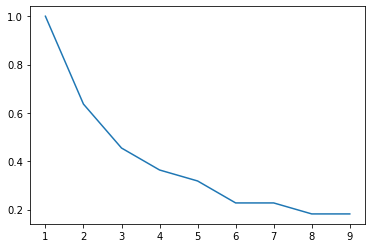

In [328]:
plt.plot(range(1,10),acc)

# 39) location_Horamavu Banaswadi

In [329]:
df39 = df[df['location_Horamavu Banaswadi']==1]
df39 = df39[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df39

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
3037,2.0,2.0,4600,1156.0,2,3979.238754,1,0,0,1
3038,2.0,2.0,5800,1180.0,2,4915.254237,1,0,0,1
3039,2.0,2.0,5160,1307.0,2,3947.972456,1,0,0,1
3040,2.0,2.0,5400,1357.0,2,3979.366249,1,0,0,1
3041,2.0,3.0,3800,925.0,2,4108.108108,1,0,0,1
3042,2.0,2.0,4800,1272.0,2,3773.584906,1,0,0,1
3043,2.0,2.0,4950,1225.0,2,4040.816327,1,0,0,1
3044,2.0,2.0,5150,1272.0,2,4048.742138,1,0,0,1
3045,2.0,2.0,5150,1272.0,2,4048.742138,1,0,0,1
3046,2.0,2.0,4690,1156.0,2,4057.093426,1,0,0,1


In [330]:
df39.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,0.468616,0.701672,0.628569,1.000000,0.058649,0.052632,-0.052632,NaN,NaN
balcony,0.468616,1.000000,0.223068,0.179163,0.468616,0.038436,0.383413,-0.383413,NaN,NaN
price,0.701672,0.223068,1.000000,0.758061,0.701672,0.306588,-0.076226,0.076226,NaN,NaN
total_sqft_int,0.628569,0.179163,0.758061,1.000000,0.628569,-0.386520,0.216552,-0.216552,NaN,NaN
bhk,1.000000,0.468616,0.701672,0.628569,1.000000,0.058649,0.052632,-0.052632,NaN,NaN
price_per_sqft,0.058649,0.038436,0.306588,-0.386520,0.058649,1.000000,-0.428979,0.428979,NaN,NaN
area_typeSuper built-up Area,0.052632,0.383413,-0.076226,0.216552,0.052632,-0.428979,1.000000,-1.000000,NaN,NaN
area_typeBuilt-up Area,-0.052632,-0.383413,0.076226,-0.216552,-0.052632,0.428979,-1.000000,1.000000,NaN,NaN
area_typePlot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_Ready To Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [331]:
x = df39[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df39[['price']]
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

k= 1 [1.0]
k= 2 [1.0, 0.7]
k= 3 [1.0, 0.7, 0.5]
k= 4 [1.0, 0.7, 0.5, 0.4]
k= 5 [1.0, 0.7, 0.5, 0.4, 0.45]
k= 6 [1.0, 0.7, 0.5, 0.4, 0.45, 0.3]
k= 7 [1.0, 0.7, 0.5, 0.4, 0.45, 0.3, 0.3]
k= 8 [1.0, 0.7, 0.5, 0.4, 0.45, 0.3, 0.3, 0.3]
k= 9 [1.0, 0.7, 0.5, 0.4, 0.45, 0.3, 0.3, 0.3, 0.2]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [332]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


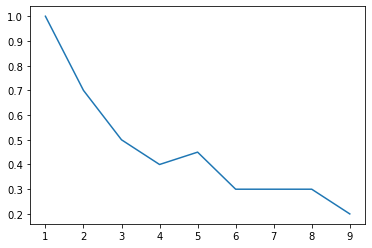

In [333]:
plt.plot(range(1,10),acc)

# 40) location_Hormavu

In [334]:
df40 = df[df['location_Hormavu']==1]
df40 = df40[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]
df40

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
3057,2.0,1.0,7800,1500.0,2,5200.000000,1,0,0,1
3058,2.0,2.0,5500,1150.0,2,4782.608696,1,0,0,1
3059,2.0,2.0,5000,1180.0,2,4237.288136,0,1,0,1
3060,2.0,0.0,6700,1200.0,2,5583.333333,0,0,1,1
3061,3.0,0.0,7000,1200.0,2,5833.333333,0,0,1,0
3062,2.0,1.0,5200,1175.0,2,4425.531915,1,0,0,1
3063,2.0,1.0,5300,1351.0,1,3923.019985,1,0,0,1
3064,2.0,1.0,4440,1141.0,2,3891.323401,1,0,0,1
3065,2.0,1.0,4230,1130.0,2,3743.362832,1,0,0,0
3066,3.0,2.0,8500,1725.0,3,4927.536232,0,1,0,1


In [335]:
df40.corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
bath,1.000000,-0.081271,0.704025,0.790195,0.734217,0.143161,-0.299244,0.124579,0.160557,-0.235223
balcony,-0.081271,1.000000,-0.035405,0.008493,0.076471,-0.078296,0.318243,0.158730,-0.416067,0.378514
price,0.704025,-0.035405,1.000000,0.870081,0.670637,0.618684,-0.272757,0.046854,0.220092,-0.019175
total_sqft_int,0.790195,0.008493,0.870081,1.000000,0.747204,0.153457,-0.165785,0.083679,0.003728,-0.123553
bhk,0.734217,0.076471,0.670637,0.747204,1.000000,0.138189,-0.119454,0.092815,-0.058860,-0.048865
price_per_sqft,0.143161,-0.078296,0.618684,0.153457,0.138189,1.000000,-0.276128,-0.029764,0.429115,0.155689
area_typeSuper built-up Area,-0.299244,0.318243,-0.272757,-0.165785,-0.119454,-0.276128,1.000000,-0.626710,-0.536543,0.299943
area_typeBuilt-up Area,0.124579,0.158730,0.046854,0.083679,0.092815,-0.029764,-0.626710,1.000000,-0.079640,0.116675
area_typePlot Area,0.160557,-0.416067,0.220092,0.003728,-0.058860,0.429115,-0.536543,-0.079640,1.000000,-0.160932
availability_Ready To Move,-0.235223,0.378514,-0.019175,-0.123553,-0.048865,0.155689,0.299943,0.116675,-0.160932,1.000000


In [336]:
x = df40[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df40[['price']]
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.46808510638297873]
k= 3 [1.0, 0.46808510638297873, 0.3191489361702128]
k= 4 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511]
k= 5 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937]
k= 6 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937, 0.19148936170212766]
k= 7 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937, 0.19148936170212766, 0.19148936170212766]
k= 8 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937, 0.19148936170212766, 0.19148936170212766, 0.14893617021276595]
k= 9 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937, 0.19148936170212766, 0.19148936170212766, 0.14893617021276595, 0.1702127659574468]


C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [337]:
max(acc)
1.0
k = acc.index(max(acc))+1
k
1
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\Sathya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


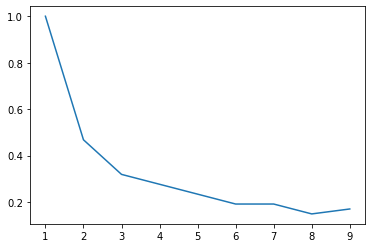

In [338]:
plt.plot(range(1,10),acc)